# Python Project ESILV - QSAR 🔬

---

## Nader Narcisse

### *Table of Contents*
  - [Abstract](#Abstract)
  - [1) Data Collection](#Data_Collection)
  - [2) Data Formating](#Data_Formating)
  - [3) Data Preprocessing](#Data_Preprocessing)
     - 3.1 Missing Data
     - 3.2 Target Enconding
  - [4) Data Processing](#Data_Processing) 
    - 4.1 Removing Outliers
    - 4.2 Standardizing
    - 4.3 Multicollinearity
  - [5) Exploratory Data Analysis (EDA)](#EDA)
    - 5.1 Univariate Analysis
    - 5.2 Bivariate Analysis
    - 5.3 Corellation Analysis
  - [6) Features Selection](#Features_Selection)
    - 6.1 Features Selection (SelectKBest)
  - [7) Handling Imbalanced Data](#Handling_Imbalanced_Data)
    - 7.1 Testing with imbalanced Data
    - 7.2 SMOTE - Oversampling
    - 7.3 NearMiss Algorithm – Undersampling
    - 7.4 Chosing the Oversampling method (SMOTE)
  - [8) Modeling](#Modeling)
    - 8.1 Model Selection - Comparison
  - [9) Testing Models](#Testing_Models)
    - 9.1 Support Vector Machine
    - 9.2  Random Forest Classifier
  - [10) Final Model & Conclusion](#Final_Model_&_Conclusion)
    - 10.1 Saving final model using Joblib
    - 10.2 Conclusion

<a name="Abstract">

## Abstract
---

The Goal of this project is to **train a reliable model to determine if a substance is biodegradable or not** by using the QSAR biodegradation Data Set provided by UCI.

Here we are dealing with a **classication problem.** We are trying to predict a discrete value output: ***Degradable*** and ***Not-Degradable.***

The challenge here personnally is that I don't have a chemical engineering background. This project was definitely intriguing for me.

DATASET LINK : https://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation

<a name="Data_Collection">

# 1) Data Collection
---

Importing standard modules.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.set()

# set up display area to show dataframe in jupyter qtconsole
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

First glance at the dataset

In [2]:
df = pd.read_csv("biodeg.csv", sep = ";", header = None)

In [3]:
df.head()

0       1   2   3   4   5   6     7   8   9   10     11     12     13  \
0  3.919  2.6909   0   0   0   0   0  31.4   2   0   0  0.000  3.106  2.550   
1  4.170  2.1144   0   0   0   0   0  30.8   1   1   0  0.000  2.461  1.393   
2  3.932  3.2512   0   0   0   0   0  26.7   2   4   0  0.000  3.279  2.585   
3  3.000  2.7098   0   0   0   0   0  20.0   0   2   0  0.000  2.100  0.918   
4  4.236  3.3944   0   0   0   0   0  29.4   2   4   0 -0.271  3.449  2.753   

      14  15     16     17  18  19  20     21  22  23  24  25     26     27  \
0  9.002   0  0.960  1.142   0   0   0  1.201   0   0   0   0  1.932  0.011   
1  8.723   1  0.989  1.144   0   0   0  1.104   1   0   0   0  2.214 -0.204   
2  9.110   0  1.009  1.152   0   0   0  1.092   0   0   0   0  1.942 -0.008   
3  6.594   0  1.108  1.167   0   0   0  1.024   0   0   0   0  1.414  1.073   
4  9.528   2  1.004  1.147   0   0   0  1.137   0   0   0   0  1.985 -0.002   

   28      29     30  31  32  33  34     35     36  37     38  39  40  41  
0   0   0.000  4.489   0   0   0   0  2.949  1.591   0  7.253   0   0  RB  
1   0   0.000  1.542   0   0   0   0  3.315  1.967   0  7.257   0   0  RB  
2   0   0.000  4.891   0   0   0   1  3.076  2.417   0  7.601   0   0  RB  
3   0   8.361  1.333   0   0   0   1  3.046  5.000   0  6.690   0   0  RB  
4   0  10.348  5.588   0   0   0   0  3.351  2.405   0  8.003   0   0  RB

In [4]:
df.shape

(1055, 42)

We can see that there are total 41 features and 1 target class named 'experimental_class' in this dataset. Also, there are 1055 instances.

<a name="Data_Formating">

# 2) Data Formating
---

The DataFrame is missing column descriptions. The following script is opening the .txt file, with the description that has been copied from the web site, and was turned into a Panda DataFrame.

In [5]:
f = open("Text_Description.txt", "r")
description_df = pd.DataFrame(columns = ["molecular_descriptors", "description"])
info = "start"
while len(info):
    info = f.readline()
    if not info: 
        break
    info = info.split(") ",1)[1][:-2]
    short = info.split(": ",1)[0]
    #description = info.split(": ",1)[1]
    description_df.loc[len(description_df)] = info.split(": ",1)

In [6]:
description_df #Column descriptions for each molecular_descriptors shows up

molecular_descriptors                                        description
0                SpMax_L             Leading eigenvalue from Laplace matrix
1                J_Dz(e)  Balaban-like index from Barysz matrix weighted...
2                    nHM                              Number of heavy atoms
3               F01[N-N]         Frequency of N-N at topological distance 1
4               F04[C-N]         Frequency of C-N at topological distance 4
5                 NssssC                      Number of atoms of type ssssC
6                   nCb-               Number of substituted benzene C(sp2)
7                     C%                              Percentage of C atoms
8                    nCp                  Number of terminal primary C(sp3)
9                     nO                             Number of oxygen atoms
10              F03[C-N]         Frequency of C-N at topological distance 3
11                 SdssC                               Sum of dssC E-states
12             HyWi_B(m)  Hyper-Wiener-like index (log function) from Bu...
13                   LOC                              Lopping centric index
14                 SM6_L     Spectral moment of order 6 from Laplace matrix
15              F03[C-O]       Frequency of C - O at topological distance 3
16                    Me  Mean atomic Sanderson electronegativity (scale...
17                    Mi  Mean first ionization potential (scaled on Car...
18                  nN-N                             Number of N hydrazines
19                nArNO2                  Number of nitro groups (aromatic)
20                 nCRX3                                     Number of CRX3
21           SpPosA_B(p)  Normalized spectral positive sum from Burden m...
22                  nCIR                                 Number of circuits
23             B01[C-Br]  Presence/absence of C - Br at topological dist...
24             B03[C-Cl]  Presence/absence of C - Cl at topological dist...
25                 N-073                   Ar2NH / Ar3N / Ar2N-Al / R..N..R
26               SpMax_A  Leading eigenvalue from adjacency matrix (Lova...
27              Psi_i_1d  Intrinsic state pseudoconnectivity index - typ...
28             B04[C-Br]  Presence/absence of C - Br at topological dist...
29                   SdO                                 Sum of dO E-states
30                 TI2_L             Second Mohar index from Laplace matrix
31                  nCrt                     Number of ring tertiary C(sp3)
32                 C-026                                           R--CX--R
33              F02[C-N]       Frequency of C - N at topological distance 2
34                 nHDon        Number of donor atoms for H-bonds (N and O)
35            SpMax_B(m)  Leading eigenvalue from Burden matrix weighted...
36               Psi_i_A  Intrinsic state pseudoconnectivity index - typ...
37                    nN                           Number of Nitrogen atoms
38              SM6_B(m)  Spectral moment of order 6 from Burden matrix ...
39               nArCOOR                        Number of esters (aromatic)
40                    nX                            Number of halogen atoms
41    experimental class  ready biodegradable (RB) and not ready biodegr...

In [7]:
df.columns = description_df.molecular_descriptors #assign describtions to column header

In [8]:
df.head()

molecular_descriptors  SpMax_L  J_Dz(e)  nHM  F01[N-N]  F04[C-N]  NssssC  \
0                        3.919   2.6909    0         0         0       0   
1                        4.170   2.1144    0         0         0       0   
2                        3.932   3.2512    0         0         0       0   
3                        3.000   2.7098    0         0         0       0   
4                        4.236   3.3944    0         0         0       0   

molecular_descriptors  nCb-    C%  nCp  nO  F03[C-N]  SdssC  HyWi_B(m)    LOC  \
0                         0  31.4    2   0         0  0.000      3.106  2.550   
1                         0  30.8    1   1         0  0.000      2.461  1.393   
2                         0  26.7    2   4         0  0.000      3.279  2.585   
3                         0  20.0    0   2         0  0.000      2.100  0.918   
4                         0  29.4    2   4         0 -0.271      3.449  2.753   

molecular_descriptors  SM6_L  F03[C-O]     Me     Mi  nN-N  nArNO2  nCRX3  \
0                      9.002         0  0.960  1.142     0       0      0   
1                      8.723         1  0.989  1.144     0       0      0   
2                      9.110         0  1.009  1.152     0       0      0   
3                      6.594         0  1.108  1.167     0       0      0   
4                      9.528         2  1.004  1.147     0       0      0   

molecular_descriptors  SpPosA_B(p)  nCIR  B01[C-Br]  B03[C-Cl]  N-073  \
0                            1.201     0          0          0      0   
1                            1.104     1          0          0      0   
2                            1.092     0          0          0      0   
3                            1.024     0          0          0      0   
4                            1.137     0          0          0      0   

molecular_descriptors  SpMax_A  Psi_i_1d  B04[C-Br]     SdO  TI2_L  nCrt  \
0                        1.932     0.011          0   0.000  4.489     0   
1                        2.214    -0.204          0   0.000  1.542     0   
2                        1.942    -0.008          0   0.000  4.891     0   
3                        1.414     1.073          0   8.361  1.333     0   
4                        1.985    -0.002          0  10.348  5.588     0   

molecular_descriptors  C-026  F02[C-N]  nHDon  SpMax_B(m)  Psi_i_A  nN  \
0                          0         0      0       2.949    1.591   0   
1                          0         0      0       3.315    1.967   0   
2                          0         0      1       3.076    2.417   0   
3                          0         0      1       3.046    5.000   0   
4                          0         0      0       3.351    2.405   0   

molecular_descriptors  SM6_B(m)  nArCOOR  nX experimental class  
0                         7.253        0   0                 RB  
1                         7.257        0   0                 RB  
2                         7.601        0   0                 RB  
3                         6.690        0   0                 RB  
4                         8.003        0   0                 RB

In [9]:
df.info() #Valid Dtype for Machine learning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SpMax_L             1055 non-null   float64
 1   J_Dz(e)             1055 non-null   float64
 2   nHM                 1055 non-null   int64  
 3   F01[N-N]            1055 non-null   int64  
 4   F04[C-N]            1055 non-null   int64  
 5   NssssC              1055 non-null   int64  
 6   nCb-                1055 non-null   int64  
 7   C%                  1055 non-null   float64
 8   nCp                 1055 non-null   int64  
 9   nO                  1055 non-null   int64  
 10  F03[C-N]            1055 non-null   int64  
 11  SdssC               1055 non-null   float64
 12  HyWi_B(m)           1055 non-null   float64
 13  LOC                 1055 non-null   float64
 14  SM6_L               1055 non-null   float64
 15  F03[C-O]            1055 non-null   int64  
 16  Me    

In [10]:
df.describe()

molecular_descriptors      SpMax_L      J_Dz(e)          nHM     F01[N-N]  \
count                  1055.000000  1055.000000  1055.000000  1055.000000   
mean                      4.782644     3.069508     0.716588     0.042654   
std                       0.546916     0.831308     1.462452     0.256010   
min                       2.000000     0.803900     0.000000     0.000000   
25%                       4.481000     2.502750     0.000000     0.000000   
50%                       4.828000     3.046300     0.000000     0.000000   
75%                       5.125000     3.437650     1.000000     0.000000   
max                       6.496000     9.177500    12.000000     3.000000   

molecular_descriptors     F04[C-N]       NssssC         nCb-           C%  \
count                  1055.000000  1055.000000  1055.000000  1055.000000   
mean                      0.980095     0.290047     1.646445    37.055640   
std                       2.332955     1.073771     2.224822     9.144466   
min                       0.000000     0.000000     0.000000     0.000000   
25%                       0.000000     0.000000     0.000000    30.450000   
50%                       0.000000     0.000000     1.000000    37.500000   
75%                       1.000000     0.000000     3.000000    43.400000   
max                      36.000000    13.000000    18.000000    60.700000   

molecular_descriptors          nCp           nO     F03[C-N]        SdssC  \
count                  1055.000000  1055.000000  1055.000000  1055.000000   
mean                      1.376303     1.803791     1.436967    -0.197129   
std                       1.963521     1.775435     3.116577     0.769662   
min                       0.000000     0.000000     0.000000    -5.256000   
25%                       0.000000     0.000000     0.000000    -0.191000   
50%                       1.000000     2.000000     0.000000     0.000000   
75%                       2.000000     3.000000     2.000000     0.000000   
max                      24.000000    12.000000    44.000000     4.722000   

molecular_descriptors    HyWi_B(m)          LOC        SM6_L     F03[C-O]  \
count                  1055.000000  1055.000000  1055.000000  1055.000000   
mean                      3.476844     1.350716     9.937381     3.630332   
std                       0.584150     0.786166     0.928678     4.457243   
min                       1.544000     0.000000     4.174000     0.000000   
25%                       3.105000     0.875000     9.533000     0.000000   
50%                       3.442000     1.187000    10.039000     2.000000   
75%                       3.825500     1.705000    10.514500     6.000000   
max                       5.701000     4.491000    12.609000    40.000000   

molecular_descriptors           Me           Mi         nN-N       nArNO2  \
count                  1055.000000  1055.000000  1055.000000  1055.000000   
mean                      1.013302     1.131106     0.008531     0.073934   
std                       0.046494     0.030143     0.101802     0.317475   
min                       0.957000     1.022000     0.000000     0.000000   
25%                       0.983000     1.116000     0.000000     0.000000   
50%                       1.003000     1.130000     0.000000     0.000000   
75%                       1.029000     1.143000     0.000000     0.000000   
max                       1.311000     1.377000     2.000000     3.000000   

molecular_descriptors        nCRX3  SpPosA_B(p)         nCIR    B01[C-Br]  \
count                  1055.000000  1055.000000  1055.000000  1055.000000   
mean                      0.029384     1.238727     1.405687     0.039810   
std                       0.217997     0.096466     4.788542     0.195606   
min                       0.000000     0.863000     0.000000     0.000000   
25%                       0.000000     1.182000     0.000000     0.000000   
50%                       0.000000     1.243000     1.000000     0.0

We have a lot of 0 values in the columns

<a name="Data_Preprocessing">

# 3) Data Preprocessing
---

## 3.1 Missing values

In [11]:
df.isnull().sum()

molecular_descriptors
SpMax_L               0
J_Dz(e)               0
nHM                   0
F01[N-N]              0
F04[C-N]              0
NssssC                0
nCb-                  0
C%                    0
nCp                   0
nO                    0
F03[C-N]              0
SdssC                 0
HyWi_B(m)             0
LOC                   0
SM6_L                 0
F03[C-O]              0
Me                    0
Mi                    0
nN-N                  0
nArNO2                0
nCRX3                 0
SpPosA_B(p)           0
nCIR                  0
B01[C-Br]             0
B03[C-Cl]             0
N-073                 0
SpMax_A               0
Psi_i_1d              0
B04[C-Br]             0
SdO                   0
TI2_L                 0
nCrt                  0
C-026                 0
F02[C-N]              0
nHDon                 0
SpMax_B(m)            0
Psi_i_A               0
nN                    0
SM6_B(m)              0
nArCOOR               0
nX                

In [12]:
df.isnull().sum().sum()

0

Fortunately, there is no missing data we can proceed with the next step

## 3.2 Target Encoding

Since it is a classification problem, **Ready Degradability** will be encoded as 1, wheres as **Non-Ready Degradability** will be decoded as 0

In [13]:
df.replace(["RB","NRB"],[1,0], inplace = True) #apply decoding

In [14]:
#rename target for better readability
df.rename(columns = {"experimental class": "degradable"}, inplace = True);

In [15]:
df.head(5)

molecular_descriptors  SpMax_L  J_Dz(e)  nHM  F01[N-N]  F04[C-N]  NssssC  \
0                        3.919   2.6909    0         0         0       0   
1                        4.170   2.1144    0         0         0       0   
2                        3.932   3.2512    0         0         0       0   
3                        3.000   2.7098    0         0         0       0   
4                        4.236   3.3944    0         0         0       0   

molecular_descriptors  nCb-    C%  nCp  nO  F03[C-N]  SdssC  HyWi_B(m)    LOC  \
0                         0  31.4    2   0         0  0.000      3.106  2.550   
1                         0  30.8    1   1         0  0.000      2.461  1.393   
2                         0  26.7    2   4         0  0.000      3.279  2.585   
3                         0  20.0    0   2         0  0.000      2.100  0.918   
4                         0  29.4    2   4         0 -0.271      3.449  2.753   

molecular_descriptors  SM6_L  F03[C-O]     Me     Mi  nN-N  nArNO2  nCRX3  \
0                      9.002         0  0.960  1.142     0       0      0   
1                      8.723         1  0.989  1.144     0       0      0   
2                      9.110         0  1.009  1.152     0       0      0   
3                      6.594         0  1.108  1.167     0       0      0   
4                      9.528         2  1.004  1.147     0       0      0   

molecular_descriptors  SpPosA_B(p)  nCIR  B01[C-Br]  B03[C-Cl]  N-073  \
0                            1.201     0          0          0      0   
1                            1.104     1          0          0      0   
2                            1.092     0          0          0      0   
3                            1.024     0          0          0      0   
4                            1.137     0          0          0      0   

molecular_descriptors  SpMax_A  Psi_i_1d  B04[C-Br]     SdO  TI2_L  nCrt  \
0                        1.932     0.011          0   0.000  4.489     0   
1                        2.214    -0.204          0   0.000  1.542     0   
2                        1.942    -0.008          0   0.000  4.891     0   
3                        1.414     1.073          0   8.361  1.333     0   
4                        1.985    -0.002          0  10.348  5.588     0   

molecular_descriptors  C-026  F02[C-N]  nHDon  SpMax_B(m)  Psi_i_A  nN  \
0                          0         0      0       2.949    1.591   0   
1                          0         0      0       3.315    1.967   0   
2                          0         0      1       3.076    2.417   0   
3                          0         0      1       3.046    5.000   0   
4                          0         0      0       3.351    2.405   0   

molecular_descriptors  SM6_B(m)  nArCOOR  nX  degradable  
0                         7.253        0   0           1  
1                         7.257        0   0           1  
2                         7.601        0   0           1  
3                         6.690        0   0           1  
4                         8.003        0   0           1

<a name="Data_Processing">

# 4) Data Processing
---

## 4.1 Removing Outliers
If we remove outliers after standardizing, the resulting data won't be standardized anymore (if many outliers are removed, standard deviation could become considerably smaller than 1)

In [16]:
y = df['degradable']
X_features = df.drop('degradable', axis=1)

In [17]:
from sklearn.neighbors import LocalOutlierFactor

columns= df.columns.tolist()

lof= LocalOutlierFactor()
y_out=lof.fit_predict(X_features)
y_out[0:30]

array([ 1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [18]:
x_score= lof.negative_outlier_factor_
outlier_score= pd.DataFrame()
outlier_score["score"]=x_score

lofthreshold= -3
loffilter= outlier_score["score"]< lofthreshold
outlier_index= outlier_score[loffilter].index.tolist()

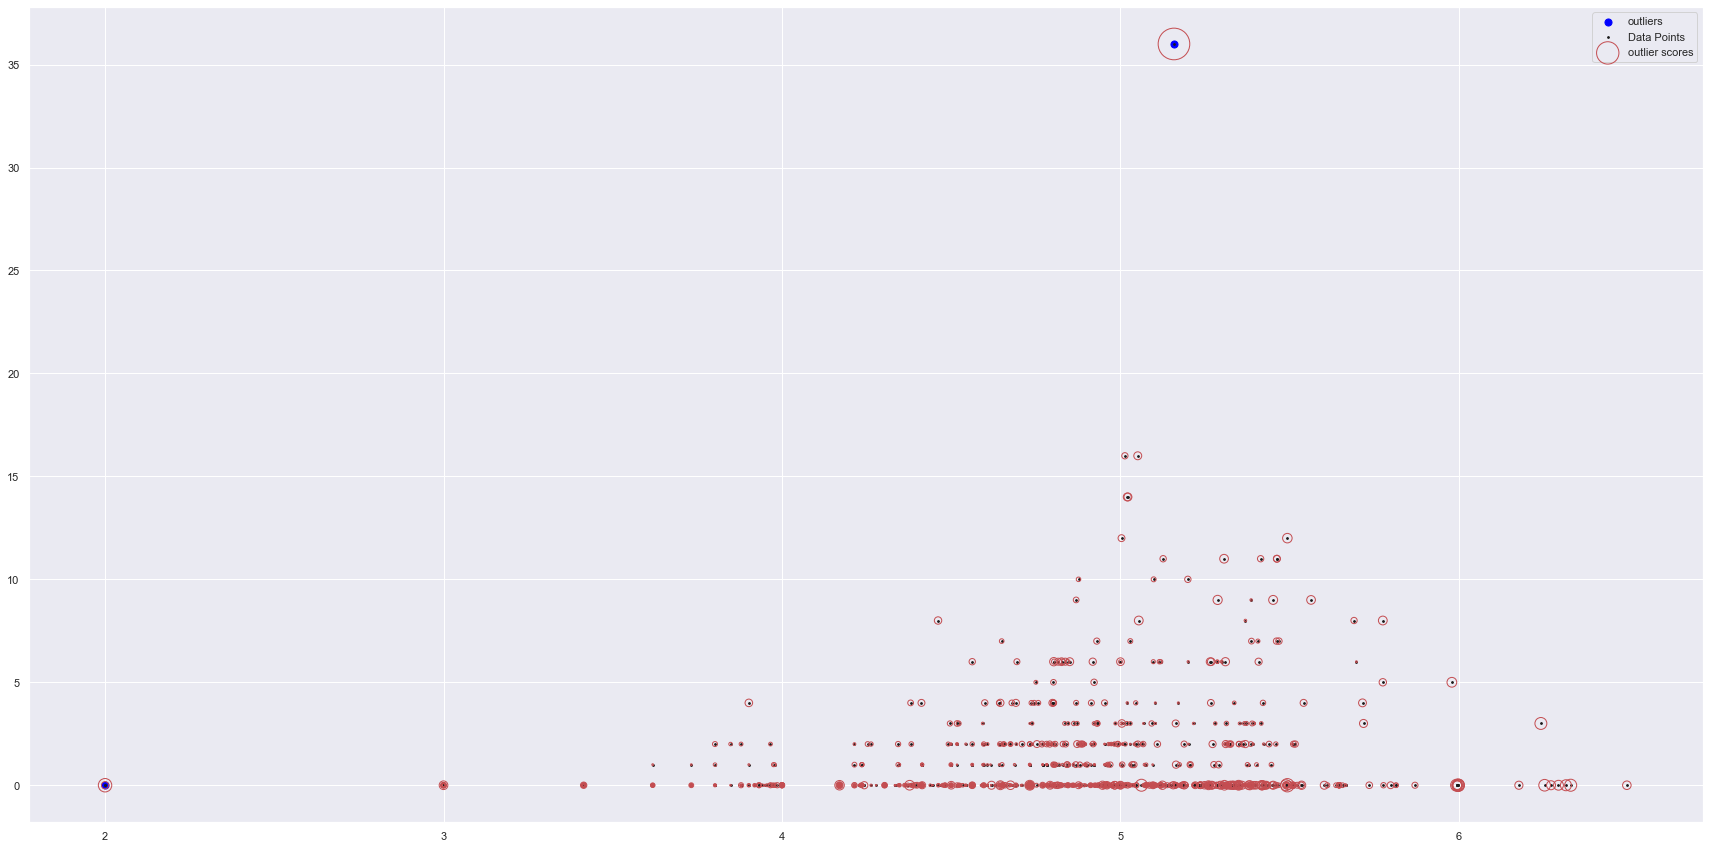

In [19]:
plt.figure(figsize=(30,15))
plt.scatter(X_features.iloc[outlier_index,0], X_features.iloc[outlier_index,4] ,color="blue",s=50,label="outliers")
plt.scatter(X_features.iloc[:,0],X_features.iloc[:,4],color="k",s=3,label="Data Points")

radius=(x_score.max()- x_score)/(x_score.max()-x_score.min())
outlier_score["radius"]=radius
plt.scatter(X_features.iloc[:,0],X_features.iloc[:,4],s=1000*radius,edgecolors="r",facecolors="none",label="outlier scores")
plt.legend()

In [20]:
X_features= X_features.drop(outlier_index)
y= y.drop(outlier_index).values

## 4.2 Standardizing

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_transform = scaler.fit_transform(X_features)
X_transform_pd = pd.DataFrame(X_transform, columns = X_features.columns)
X_transform_pd.head(10)

molecular_descriptors   SpMax_L   J_Dz(e)       nHM  F01[N-N]  F04[C-N]  \
0                     -1.602725 -0.460794 -0.489625 -0.164236 -0.458056   
1                     -1.138156 -1.156655 -0.489625 -0.164236 -0.458056   
2                     -1.578664  0.215513 -0.489625 -0.164236 -0.458056   
3                     -3.303677 -0.437981 -0.489625 -0.164236 -0.458056   
4                     -1.015999  0.388362 -0.489625 -0.164236 -0.458056   
5                     -1.015999  0.429643 -0.489625 -0.164236 -0.458056   
6                      0.398068  2.383849  0.194162 -0.164236 -0.458056   
7                     -0.481097  0.914272 -0.489625 -0.164236 -0.458056   
8                     -0.349685  0.006091 -0.489625 -0.164236 -0.458056   
9                      0.472103  0.650050 -0.489625 -0.164236  0.025244   

molecular_descriptors    NssssC      nCb-        C%       nCp        nO  \
0                     -0.270524 -0.741296 -0.626252  0.316308 -1.018418   
1                     -0.270524 -0.741296 -0.692489 -0.192977 -0.454890   
2                     -0.270524 -0.741296 -1.145115  0.316308  1.235695   
3                     -0.270524 -0.741296 -1.884772 -0.702262  0.108638   
4                     -0.270524 -0.741296 -0.847045  0.316308  1.235695   
5                     -0.270524 -0.741296 -0.935362  0.316308  1.235695   
6                     -0.270524 -0.741296 -2.867302 -0.702262  0.672167   
7                     -0.270524 -0.741296 -0.604172  0.825594  0.108638   
8                     -0.270524  0.162159  0.808904  0.316308 -1.018418   
9                     -0.270524  0.162159  0.455635 -0.702262  1.235695   

molecular_descriptors  F03[C-N]     SdssC  HyWi_B(m)       LOC     SM6_L  \
0                     -0.494287  0.256505  -0.640523  1.525356 -1.031790   
1                     -0.494287  0.256505  -1.753124  0.050927 -1.338338   
2                     -0.494287  0.256505  -0.342104  1.569959 -0.913126   
3                     -0.494287  0.256505  -2.375835 -0.554392 -3.677548   
4                     -0.494287 -0.095453  -0.048861  1.784050 -0.453854   
5                     -0.494287 -0.100648  -0.283456  1.489674 -0.613171   
6                     -0.494287  0.256505  -1.044164 -0.804165 -0.312117   
7                     -0.494287  0.205854  -0.102335  1.420859 -0.170380   
8                     -0.494287  0.256505  -0.875118 -0.609189 -0.440670   
9                      0.566482 -1.418864   0.009788 -0.121111  0.239448   

molecular_descriptors  F03[C-O]        Me        Mi      nN-N    nArNO2  \
0                     -0.816154 -1.145988  0.365652 -0.078199 -0.233224   
1                     -0.591765 -0.522546  0.432399 -0.078199 -0.233224   
2                     -0.816154 -0.092586  0.699389 -0.078199 -0.233224   
3                     -0.816154  2.035716  1.199993 -0.078199 -0.233224   
4                     -0.367376 -0.200076  0.532520 -0.078199 -0.233224   
5                     -0.591765  0.014904  0.599268 -0.078199 -0.233224   
6                     -0.816154  1.691748  0.732762 -0.078199 -0.233224   
7                      0.305791 -0.716028  0.365652 -0.078199 -0.233224   
8                     -0.816154 -0.974004 -0.535436 -0.078199 -0.233224   
9                      0.978958  1.197294 -0.134952 -0.078199  2.915297   

molecular_descriptors     nCRX3  SpPosA_B(p)      nCIR  B01[C-Br]  B03[C-Cl]  \
0                     -0.134984    -0.396380 -0.758157  -0.203821  -0.415459   
1                     -0.134984    -1.410295 -0.160598  -0.203821  -0.415459   
2                     -0.134984    -1.535728 -0.758157  -0.203821  -0.415459   
3                     -0.134984    -2.246514 -0.758157  -0.203821  -0.415459   
4                     -0.134984    -1.065355 -0.758157  -0.203821  -0.415459   
5                     -0.134984    -1.253504 -0.758157  -0.203821  -0.415459   
6                     -0.134984    -1.190788 -0.758157  -0.203821  -0.415459   
7                     -0.134984    -0.626340 

In [22]:
X_transform_pd.head(10).style.background_gradient(cmap='Blues')

## 4.3 Multicollinearity

Multicollinearity refers to a situation in which more than two explanatory variables in a multiple regression model are highly linearly related.
There's a known problem with variable

In the next step multicolinearity is checked. This becomes a problem when running Regression models. Thus, highly cocorrelated features (|r| > 0.90) will be dropped. When deciding which of two correlated features to keep, the one with the higher correlation to the traget and therefore higher prediction value will be keept.

In [23]:
df.corr().style.background_gradient(cmap='Reds')

In [24]:
#get critical correlation values
df.corr().applymap(lambda x: x if abs(x)>.90 else "")

molecular_descriptors   SpMax_L J_Dz(e)  nHM F01[N-N] F04[C-N] NssssC nCb-  \
molecular_descriptors                                                        
SpMax_L                     1.0                                              
J_Dz(e)                             1.0                                      
nHM                                      1.0                                 
F01[N-N]                                          1.0                        
F04[C-N]                                                   1.0               
NssssC                                                            1.0        
nCb-                                                                   1.0   
C%                                                                           
nCp                                                                          
nO                                                                           
F03[C-N]                                                                     
SdssC                                                                        
HyWi_B(m)                                                                    
LOC                                                                          
SM6_L                  0.911546                                              
F03[C-O]                                                                     
Me                                                                           
Mi                                                                           
nN-N                                                                         
nArNO2                                                                       
nCRX3                                                                        
SpPosA_B(p)                                                                  
nCIR                                                                         
B01[C-Br]                                                                    
B03[C-Cl]                                                                    
N-073                                                                        
SpMax_A                0.918928                                              
Psi_i_1d                                                                     
B04[C-Br]                                                                    
SdO                                                                          
TI2_L                                                                        
nCrt                                                                         
C-026                                                                        
F02[C-N]                                                                     
nHDon                                                                        
SpMax_B(m)                                                                   
Psi_i_A                                                                      
nN                                                                           
SM6_B(m)                                                                     
nArCOOR                                                                      
nX                                                                           
degradable                                                                   

molecular_descriptors   C%  nCp   nO F03[C-N] SdssC HyWi_B(m)  LOC     SM6_L  \
molecular_descriptors                                                          
SpMax_L                                                             0.911546   
J_Dz(e)                                                                        
nHM                                                                            
F01[N-N]                                                                       
F04[C-N]                                                                       
NssssC 

In [25]:
df.columns

Index(['SpMax_L', 'J_Dz(e)', 'nHM', 'F01[N-N]', 'F04[C-N]', 'NssssC', 'nCb-',
       'C%', 'nCp', 'nO', 'F03[C-N]', 'SdssC', 'HyWi_B(m)', 'LOC', 'SM6_L',
       'F03[C-O]', 'Me', 'Mi', 'nN-N', 'nArNO2', 'nCRX3', 'SpPosA_B(p)',
       'nCIR', 'B01[C-Br]', 'B03[C-Cl]', 'N-073', 'SpMax_A', 'Psi_i_1d',
       'B04[C-Br]', 'SdO', 'TI2_L', 'nCrt', 'C-026', 'F02[C-N]', 'nHDon',
       'SpMax_B(m)', 'Psi_i_A', 'nN', 'SM6_B(m)', 'nArCOOR', 'nX',
       'degradable'],
      dtype='object', name='molecular_descriptors')

In [26]:
df = df.drop(columns=["SM6_L","SpMax_A","SM6_B(m)"])

In [27]:
df.columns

Index(['SpMax_L', 'J_Dz(e)', 'nHM', 'F01[N-N]', 'F04[C-N]', 'NssssC', 'nCb-',
       'C%', 'nCp', 'nO', 'F03[C-N]', 'SdssC', 'HyWi_B(m)', 'LOC', 'F03[C-O]',
       'Me', 'Mi', 'nN-N', 'nArNO2', 'nCRX3', 'SpPosA_B(p)', 'nCIR',
       'B01[C-Br]', 'B03[C-Cl]', 'N-073', 'Psi_i_1d', 'B04[C-Br]', 'SdO',
       'TI2_L', 'nCrt', 'C-026', 'F02[C-N]', 'nHDon', 'SpMax_B(m)', 'Psi_i_A',
       'nN', 'nArCOOR', 'nX', 'degradable'],
      dtype='object', name='molecular_descriptors')

In [28]:
df.corr().applymap(lambda x: x if abs(x)>.90 else "")

molecular_descriptors SpMax_L J_Dz(e)  nHM F01[N-N] F04[C-N] NssssC nCb-   C%  \
molecular_descriptors                                                           
SpMax_L                   1.0                                                   
J_Dz(e)                           1.0                                           
nHM                                    1.0                                      
F01[N-N]                                        1.0                             
F04[C-N]                                                 1.0                    
NssssC                                                          1.0             
nCb-                                                                 1.0        
C%                                                                        1.0   
nCp                                                                             
nO                                                                              
F03[C-N]                                                                        
SdssC                                                                           
HyWi_B(m)                                                                       
LOC                                                                             
F03[C-O]                                                                        
Me                                                                              
Mi                                                                              
nN-N                                                                            
nArNO2                                                                          
nCRX3                                                                           
SpPosA_B(p)                                                                     
nCIR                                                                            
B01[C-Br]                                                                       
B03[C-Cl]                                                                       
N-073                                                                           
Psi_i_1d                                                                        
B04[C-Br]                                                                       
SdO                                                                             
TI2_L                                                                           
nCrt                                                                            
C-026                                                                           
F02[C-N]                                                                        
nHDon                                                                           
SpMax_B(m)                                                                      
Psi_i_A                                                                         
nN                                                                              
nArCOOR                                                                         
nX                                                                              
degradable                                                                      

molecular_descriptors  nCp   nO F03[C-N] SdssC HyWi_B(m)  LOC F03[C-O]   Me  \
molecular_descriptors                                                         
SpMax_L                                                                       
J_Dz(e)                                                                       
nHM                                                                           
F01[N-N]                                                                      
F04[C-N]                                                                      
NssssC                                                                        
nCb-                                          

The following variables have been dropped

<a name="EDA">

# 5) Exploratory Data Analysis (EDA)
---

In [29]:
pd.set_option('use_inf_as_na', True)
from sklearn.base import clone
import matplotlib.colors as mcolors
import plotly.graph_objs as go
import plotly.offline as py

## 5.1 Univariate Analysis
Identify Data distribution

In [30]:
bio_df = df.loc[df["degradable"] == 1]
no_bio_df = df.loc[df["degradable"] == 0]

In [31]:
trace = go.Pie(labels = ['Degradable', 'Not-Degradable'], values = df['degradable'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of target variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [32]:
corr_keep = list(set(df.columns))

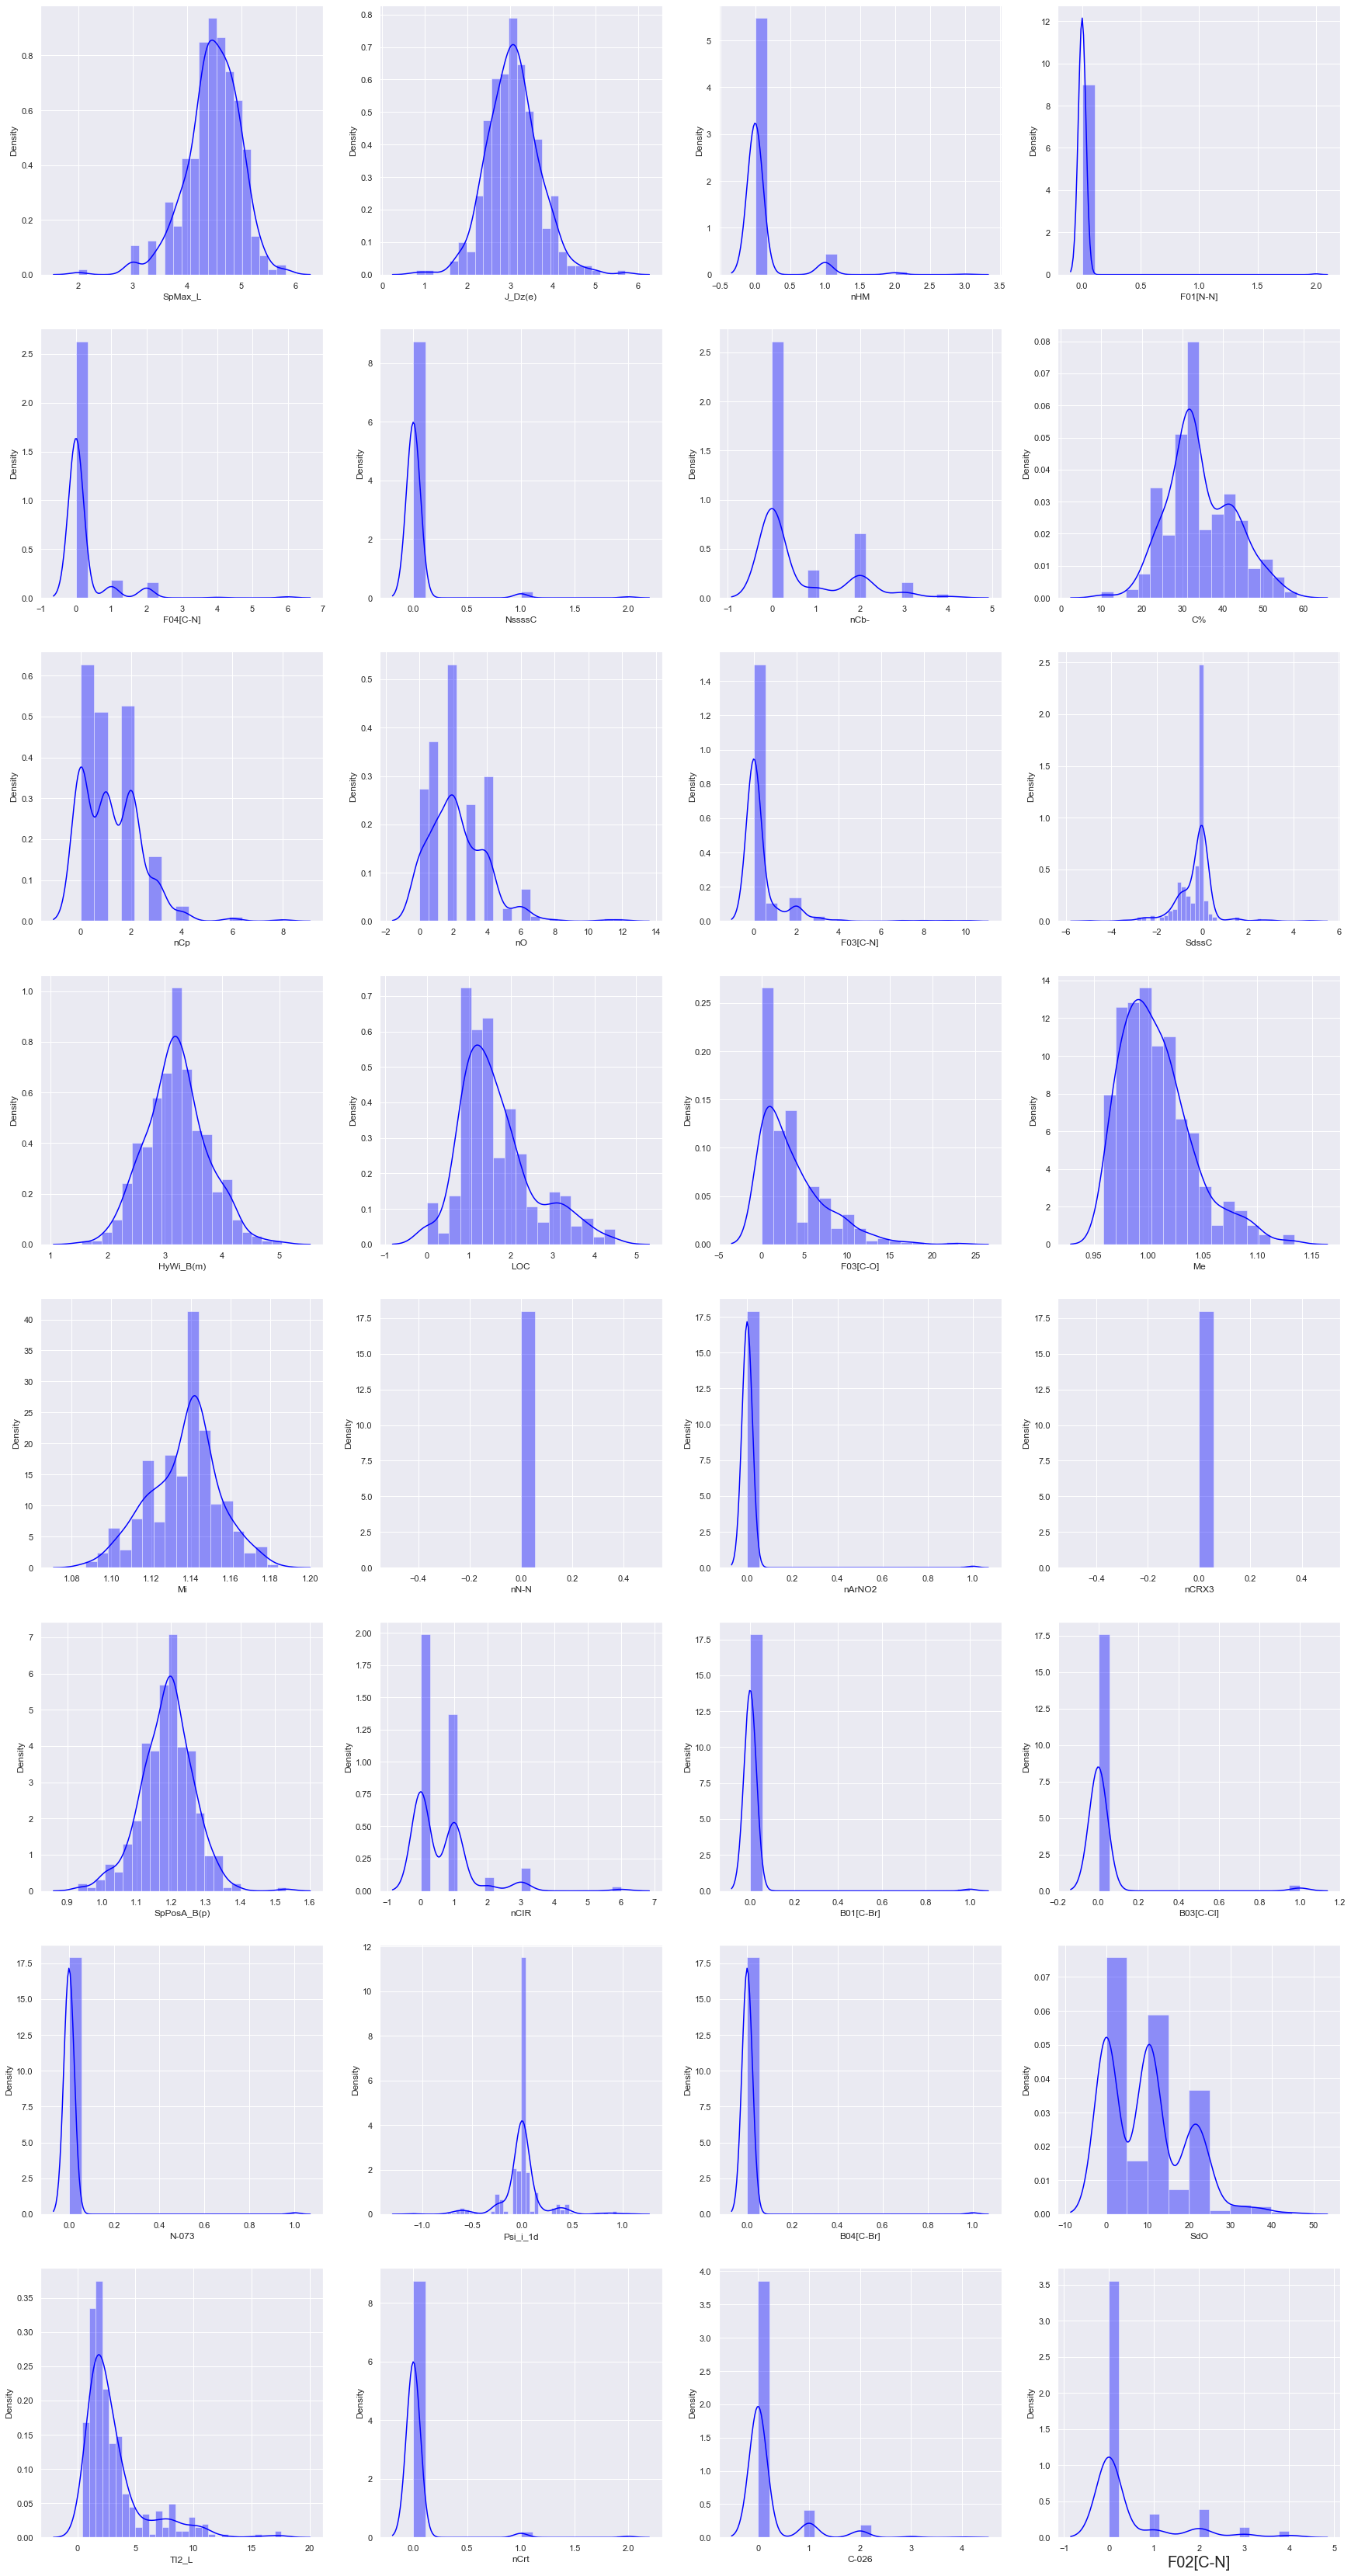

In [33]:
color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(8,4, figsize=(30,60))
k = 0
columns = list(bio_df.columns)
for i in range(8):
    for j in range(4):
            sns.distplot(bio_df[columns[k]], ax = ax1[i][j], color = 'blue', )
            plt.xlabel(columns[k],size=20)
            k += 1
plt.show()

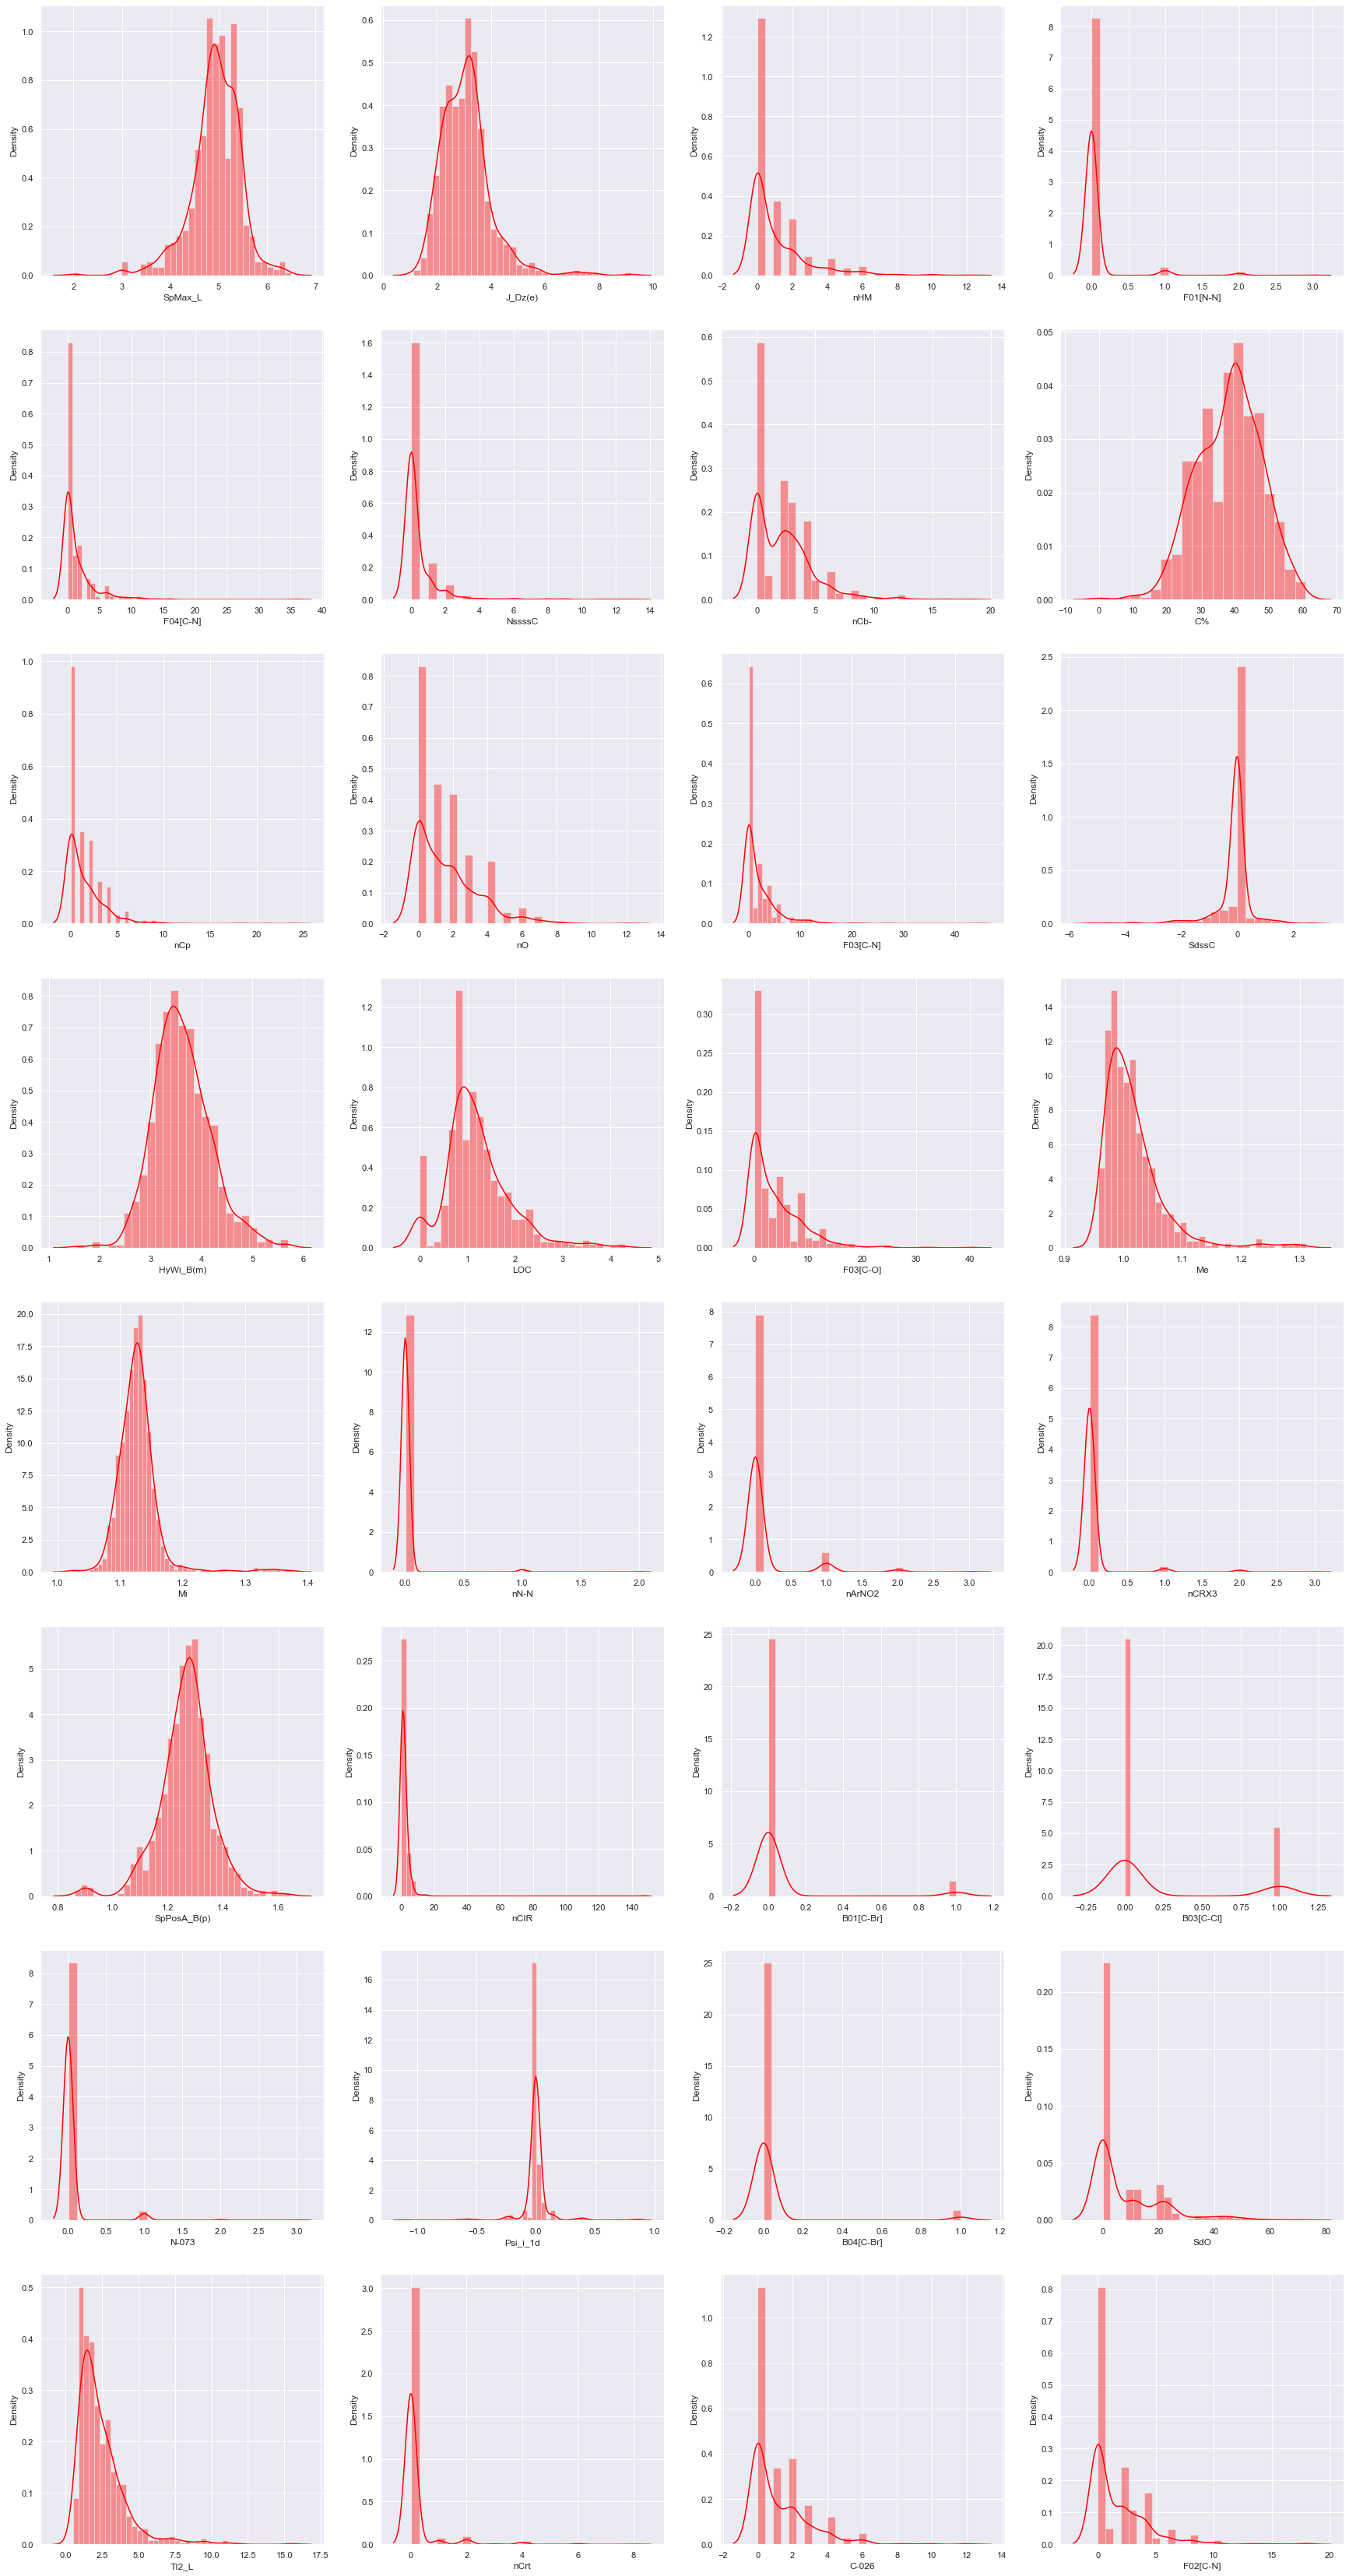

In [34]:
color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(8,4, figsize=(30,60))
k = 0
columns = list(no_bio_df.columns)
for i in range(8):
    for j in range(4):
        sns.distplot(no_bio_df[columns[k]], ax = ax1[i][j], color = 'red')
        k += 1
plt.show()

## 5.2 Bivariate Analysis
Identify Dependency

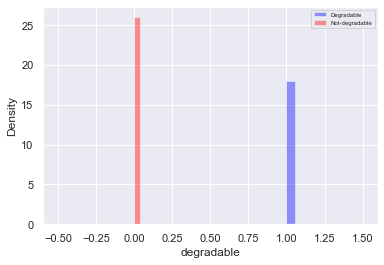

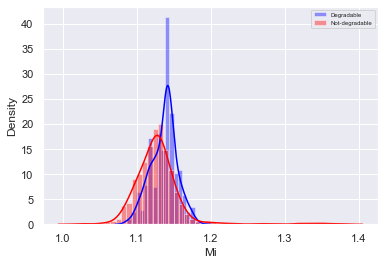

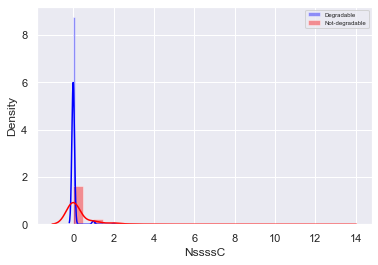

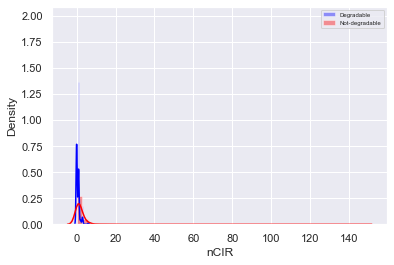

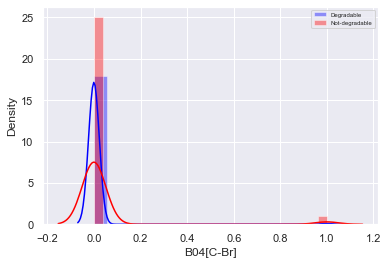

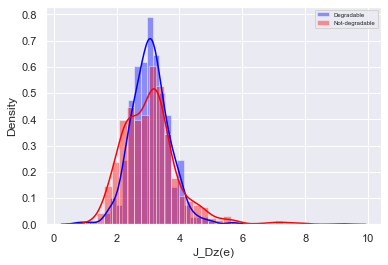

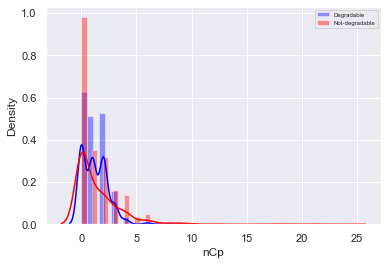

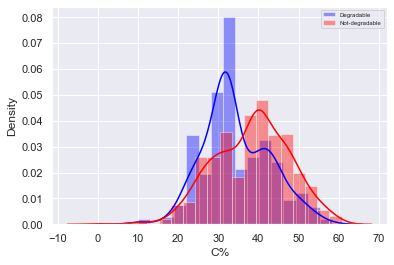

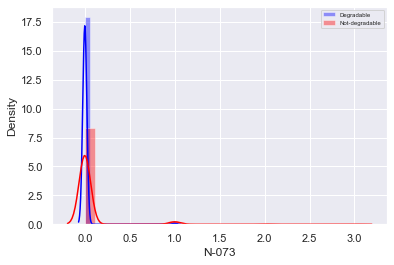

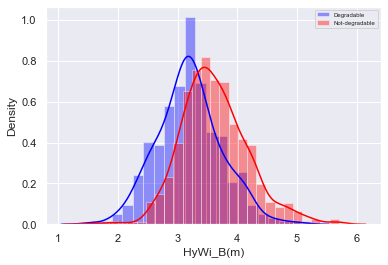

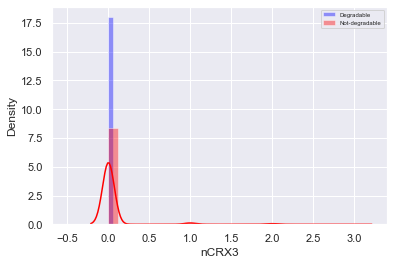

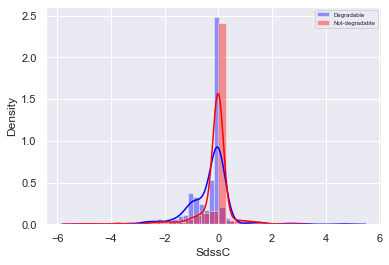

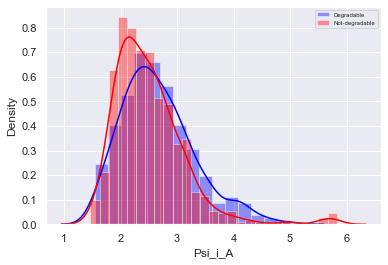

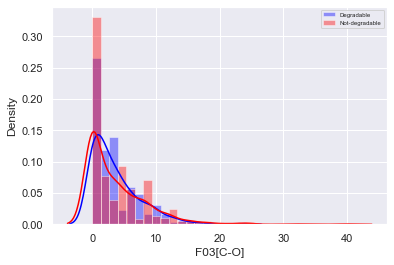

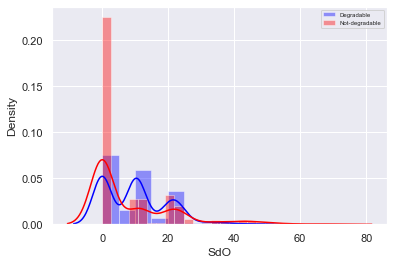

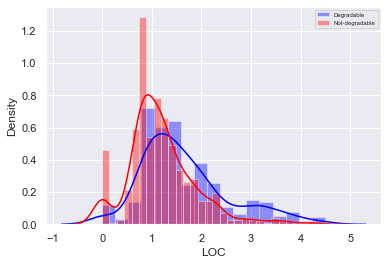

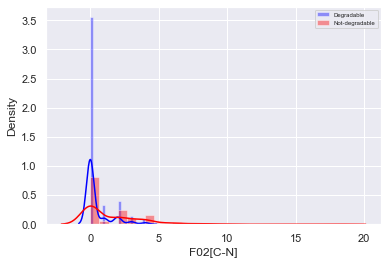

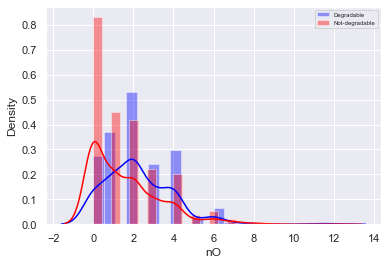

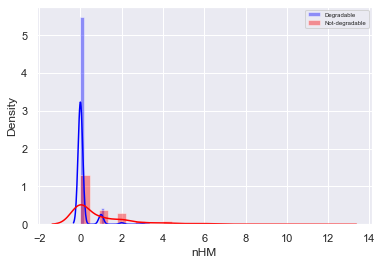

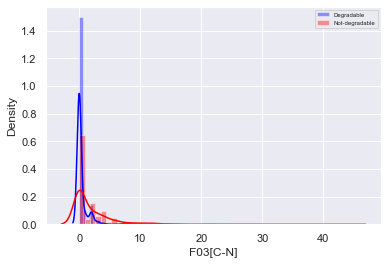

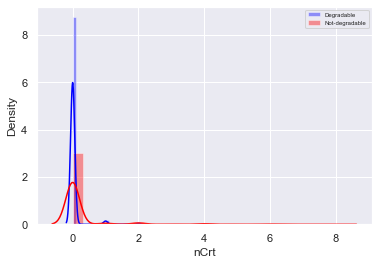

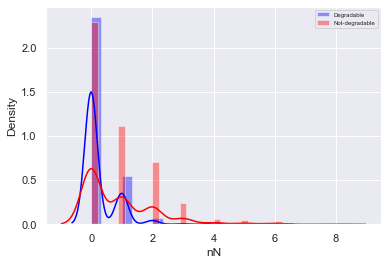

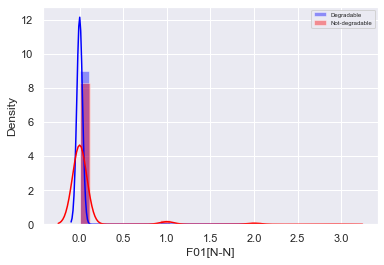

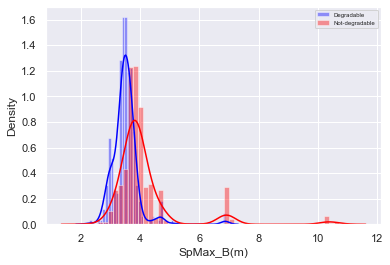

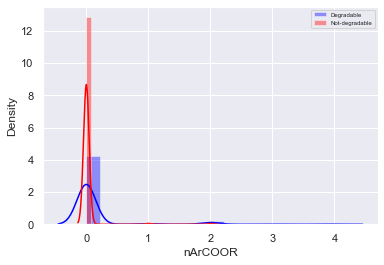

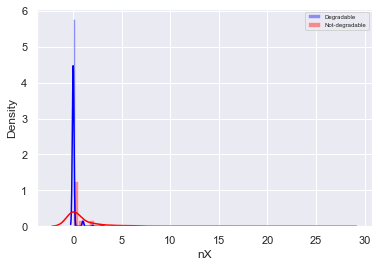

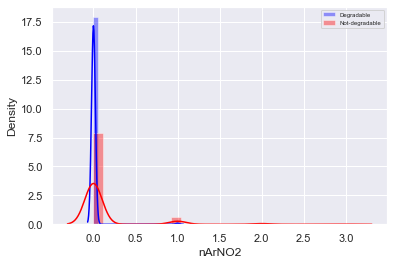

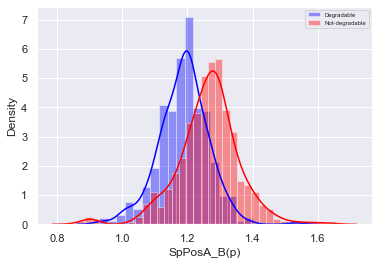

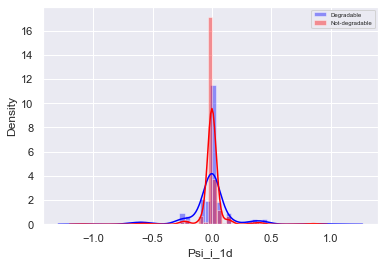

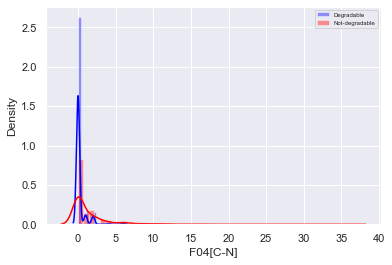

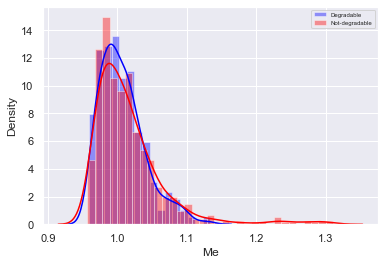

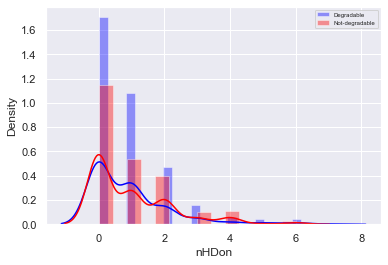

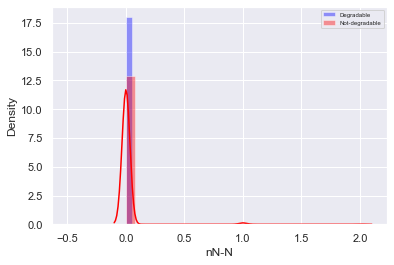

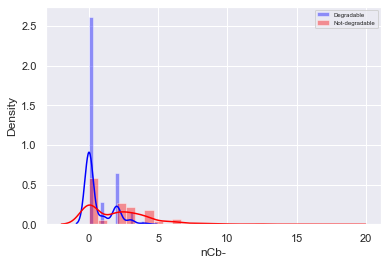

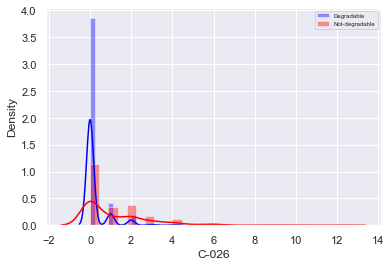

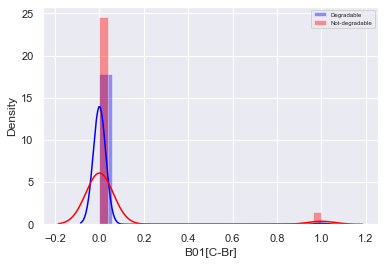

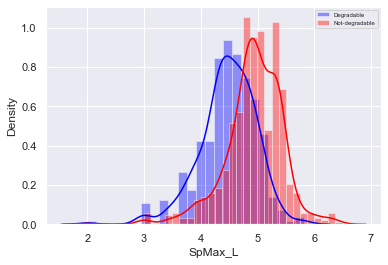

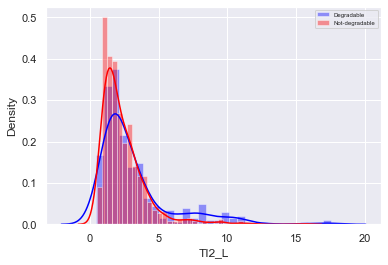

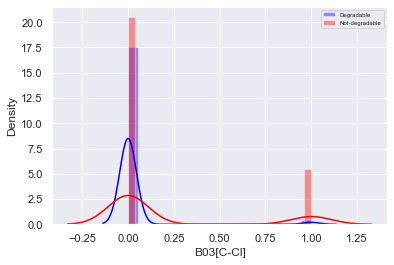

In [35]:
features = corr_keep

#plot the features side by side
for col in list(filter(lambda x: x != "diagnosis", features)):
    sns.distplot(bio_df[col], label = "Degradable", color = "blue")
    sns.distplot(no_bio_df[col], label = "Not-degradable", color ='red' )
    plt.legend(loc=1, prop={'size': 6})
    plt.show()

## 5.3 Corellation Analysis
Identify collinearity

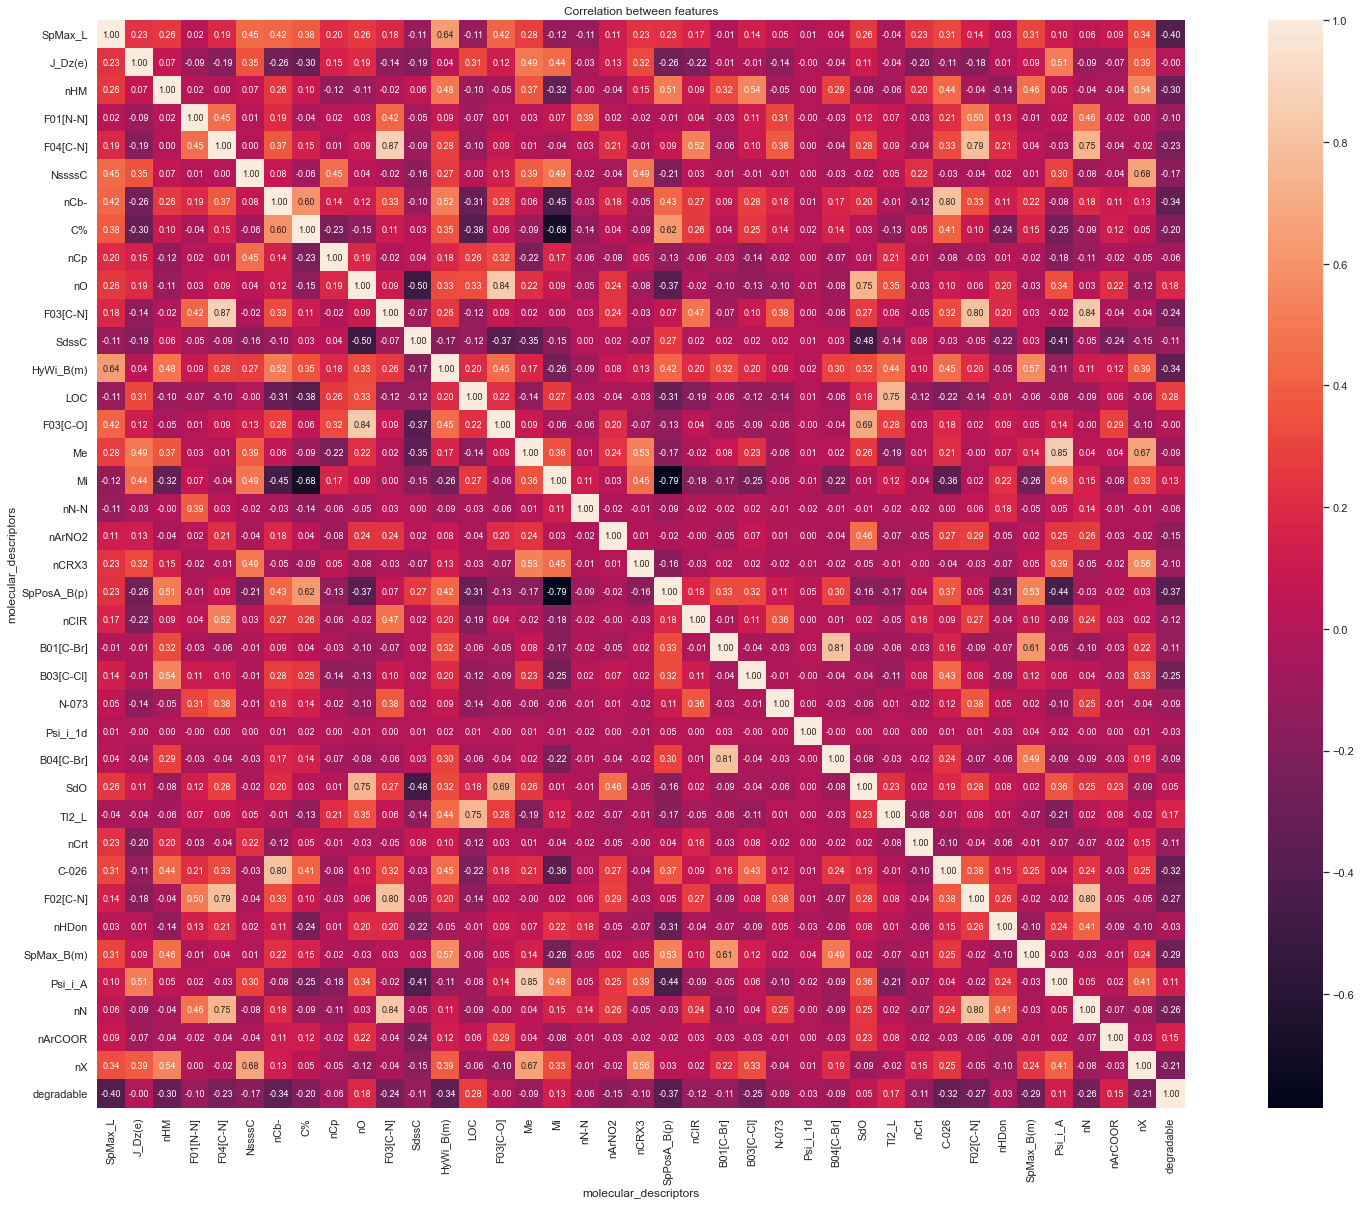

In [36]:
corrmat = df.corr()
plt.figure(figsize = (30, 20),)
sns.heatmap(corrmat,
            square=True,
            annot = True,
            annot_kws={'size': 9},
            fmt = ".2f")
plt.title('Correlation between features');
plt.show()

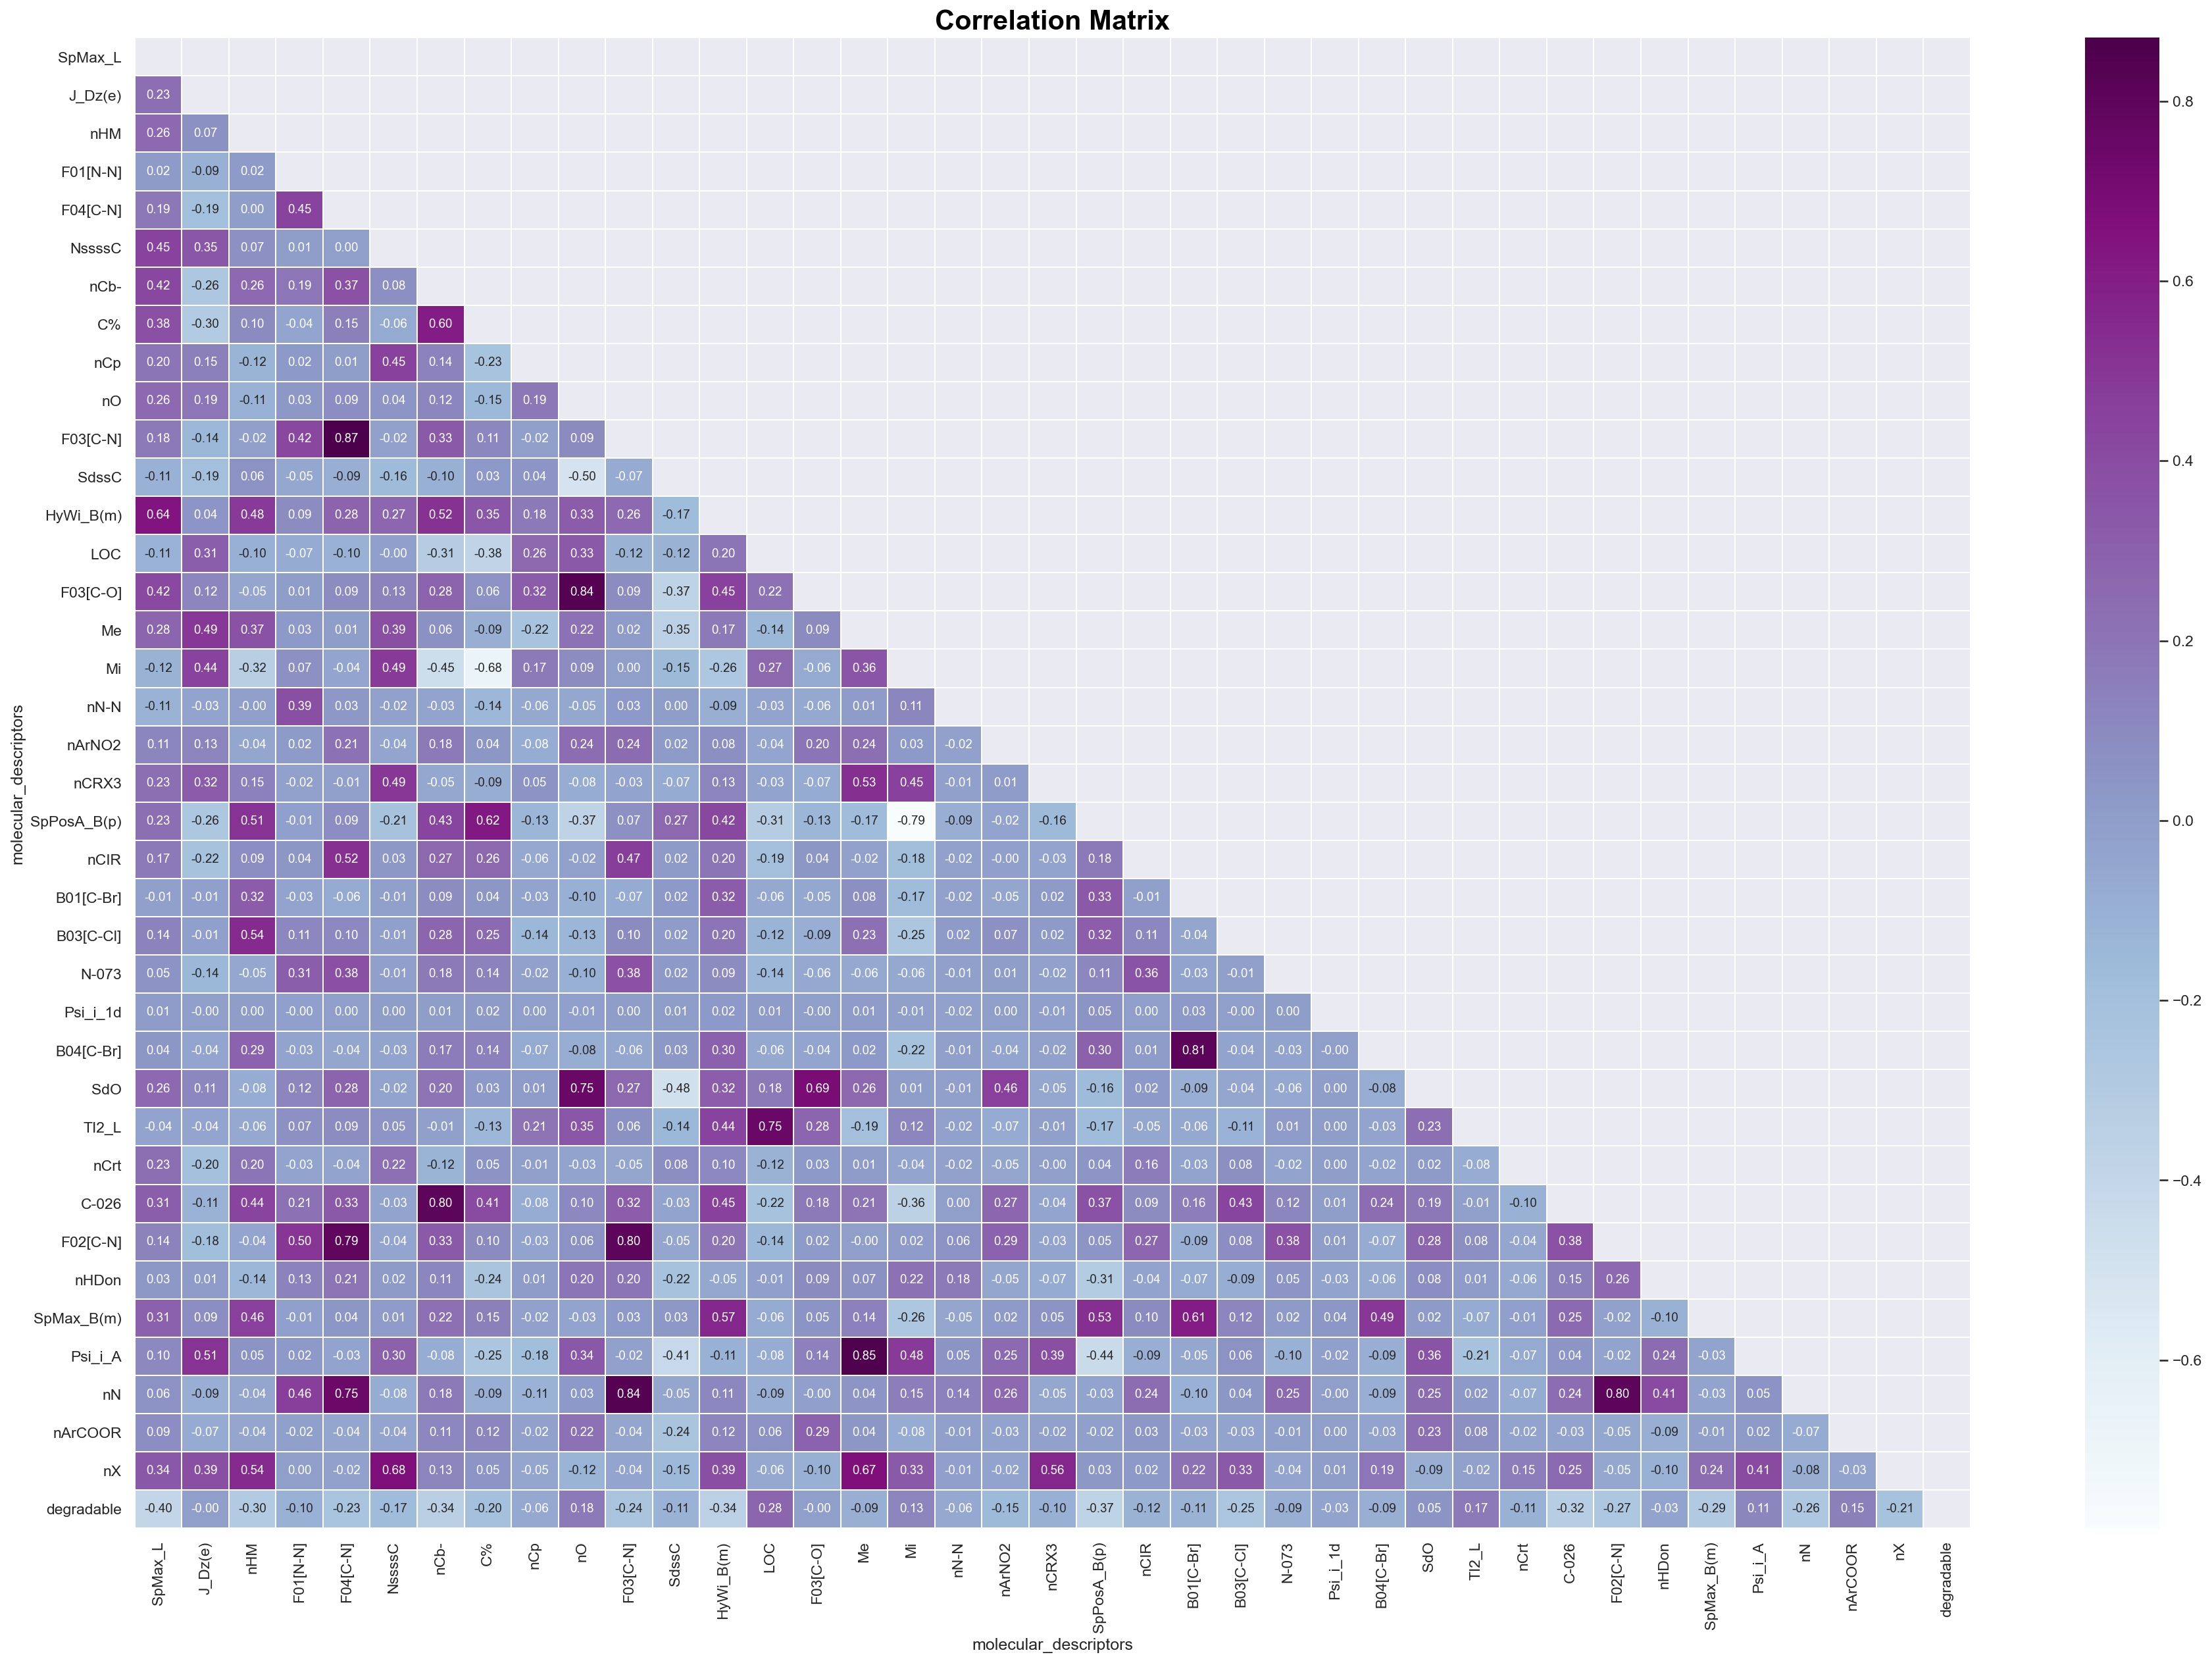

In [37]:
# Correlation matrix
plt.figure(figsize = (30, 20), dpi = 150)

mask = np.triu(np.ones_like(corrmat, dtype = bool))
sns.heatmap(corrmat,
            mask = mask,
            cmap = 'BuPu',
            annot = True,
            annot_kws={'size': 9},
            linewidths = 0.5,
            fmt = ".2f")

plt.title('Correlation Matrix',
          fontsize = 20,
          weight = 'semibold',
          color = 'Black')
plt.show()

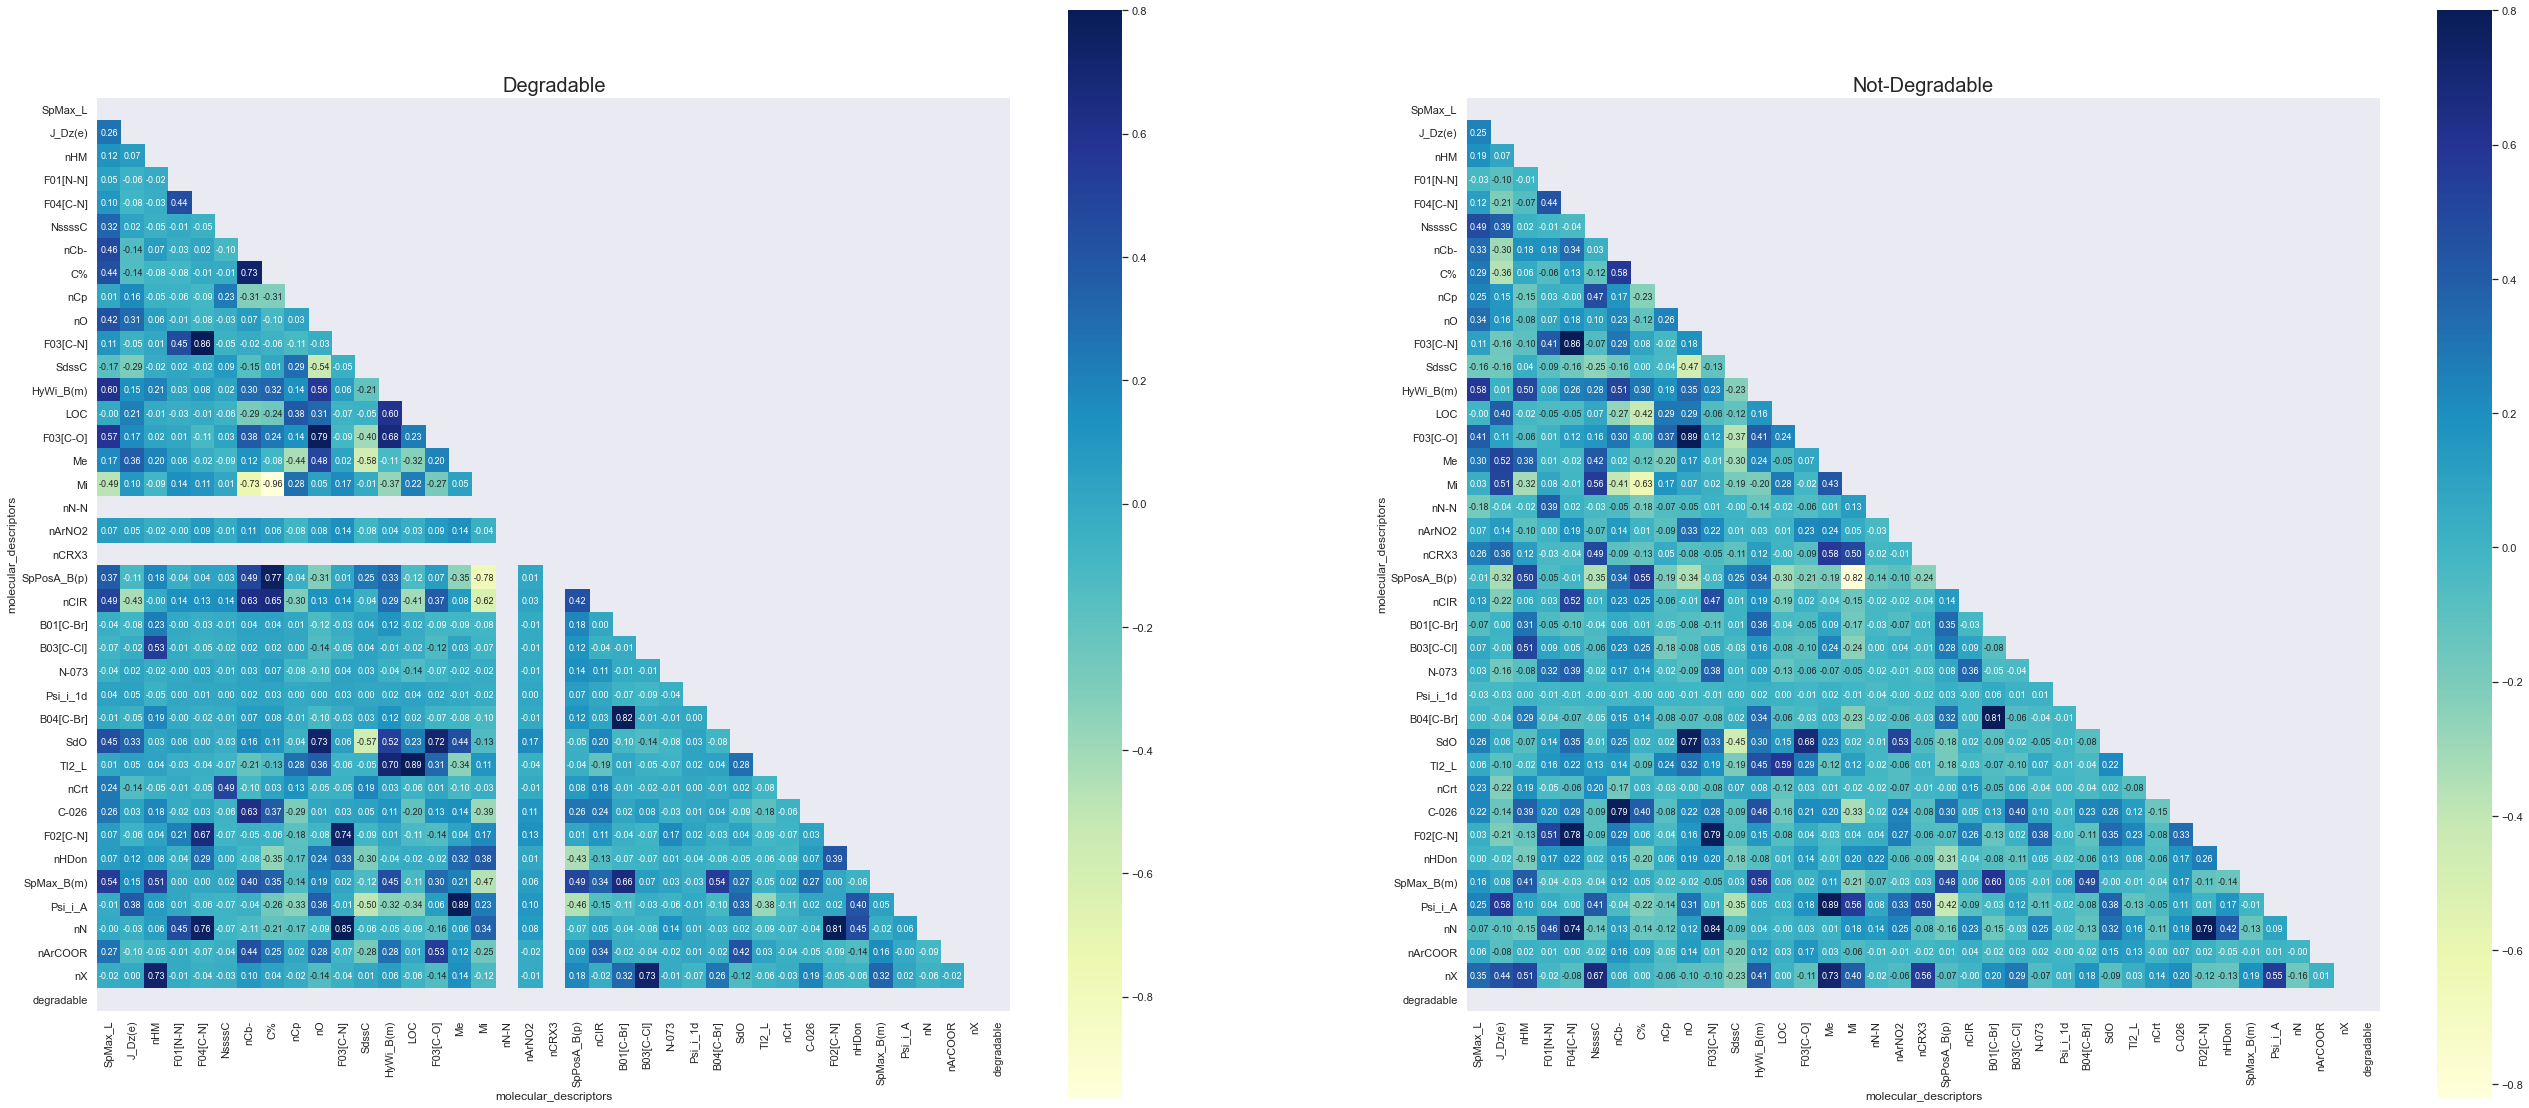

In [38]:
# Correlation matrix 
f, (ax1, ax2) = plt.subplots(1,2,figsize =(45, 20))

mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap((df.loc[df['degradable'] == 1]).corr(), 
            vmax = .8,
            square=True,
            annot = True,
            annot_kws={'size': 9},
            fmt = ".2f",
            ax = ax1, 
            cmap = 'YlGnBu', 
            mask=mask);
ax1.set_title('Degradable',
             fontsize = 20)

sns.heatmap((df.loc[df['degradable'] == 0]).corr(),
            vmax = .8,
            square=True,
            annot = True,
            annot_kws={'size': 9},
            fmt = ".2f",
            ax = ax2,
            cmap = 'YlGnBu',
            mask=mask);

ax2.set_title('Not-Degradable',
             fontsize = 20)
plt.show()

If there is no correlation between two variables, it means that the variables do not appear to be statistically related, that the value of one variable doesn’t increase or decrease in association with the increase or decrease of the other variable. Here we see that **nN-N** and **nCRX3** are two varibles not correlated with the other variables for the **Degradable** class.

<a name="Features_Selection">

# 6) Features Selection 
---


## 6.1 Features Selection (SelectKBest)

In [39]:
#Selecting the best 30 features
from sklearn.feature_selection import SelectKBest, f_classif
kBest = SelectKBest(f_classif, k = 30)
X_kBestFeatures = kBest.fit_transform(X_transform, y)
X_kBestFeatures.shape

(1053, 30)

In [40]:
X_kBestFeatures = X_transform_pd.iloc[:, kBest.get_support(True)]
X_kBestFeatures.columns

Index(['SpMax_L', 'nHM', 'F01[N-N]', 'F04[C-N]', 'NssssC', 'nCb-', 'C%', 'nO',
       'F03[C-N]', 'SdssC', 'HyWi_B(m)', 'LOC', 'SM6_L', 'Mi', 'nArNO2',
       'SpPosA_B(p)', 'nCIR', 'B01[C-Br]', 'B03[C-Cl]', 'SpMax_A', 'TI2_L',
       'nCrt', 'C-026', 'F02[C-N]', 'SpMax_B(m)', 'Psi_i_A', 'nN', 'SM6_B(m)',
       'nArCOOR', 'nX'],
      dtype='object', name='molecular_descriptors')

<a name="Handling_Imbalanced_Data">

# 7) Handling Imbalanced Data 
---

## 7.1 Testing with imbalanced Data

In [41]:
print('Not Degradable', round(df['degradable'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Degradable', round(df['degradable'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Not Degradable 66.26 % of the dataset
Degradable 33.74 % of the dataset


As seen before, we can see almost 2/3 of them are non-ready degradable while the rest of 1/3 of them are ready degradable.

There is an significant class imbalance. Class imbalance will lead to a bias towards the majority class. In this case we will perform an **overssampling** or **undersampling** method to equalise the data and choose one of them.

Let's try this initially without any method and let's see if this changes anything

In [42]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X_kBestFeatures, y, test_size=0.30, random_state=30)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (737, 30)
Number transactions y_train dataset:  (737,)
Number transactions X_test dataset:  (316, 30)
Number transactions y_test dataset:  (316,)


In [43]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
# logistic regression object
lr = LogisticRegression(random_state=30)
  
# train the model on train set
clf = lr.fit(X_train, y_train.ravel())
  
predictions = lr.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       211
           1       0.76      0.83      0.79       105

    accuracy                           0.86       316
   macro avg       0.84      0.85      0.84       316
weighted avg       0.86      0.86      0.86       316



The recall of the minority class in very less. It proves that the model is more biased towards majority class. We can confirm this by seeing the f1-score. So, it proves that this is not the best model.

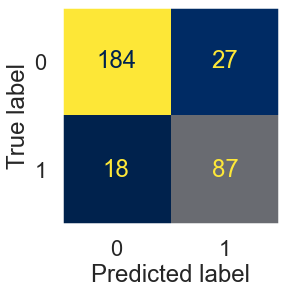

In [44]:
sns.set_context("poster")
disp = plot_confusion_matrix(clf, X_test, y_test, cmap = 'cividis', colorbar=False)
plt.grid(False)

## 7.2 SMOTE - Oversampling 
SMOTE is an intelligent alternative to oversampling: rather than creating duplicates of the minority class, it creates synthetic data points that are relatively similar to the original ones.
Using SMOTE, the model start detected more cases of the minority class, which will result in an increased recall, but a decreased precision. 

In [45]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 251
Before OverSampling, counts of label '0': 486 

After OverSampling, the shape of train_X: (972, 30)
After OverSampling, the shape of train_y: (972,) 

After OverSampling, counts of label '1': 486
After OverSampling, counts of label '0': 486


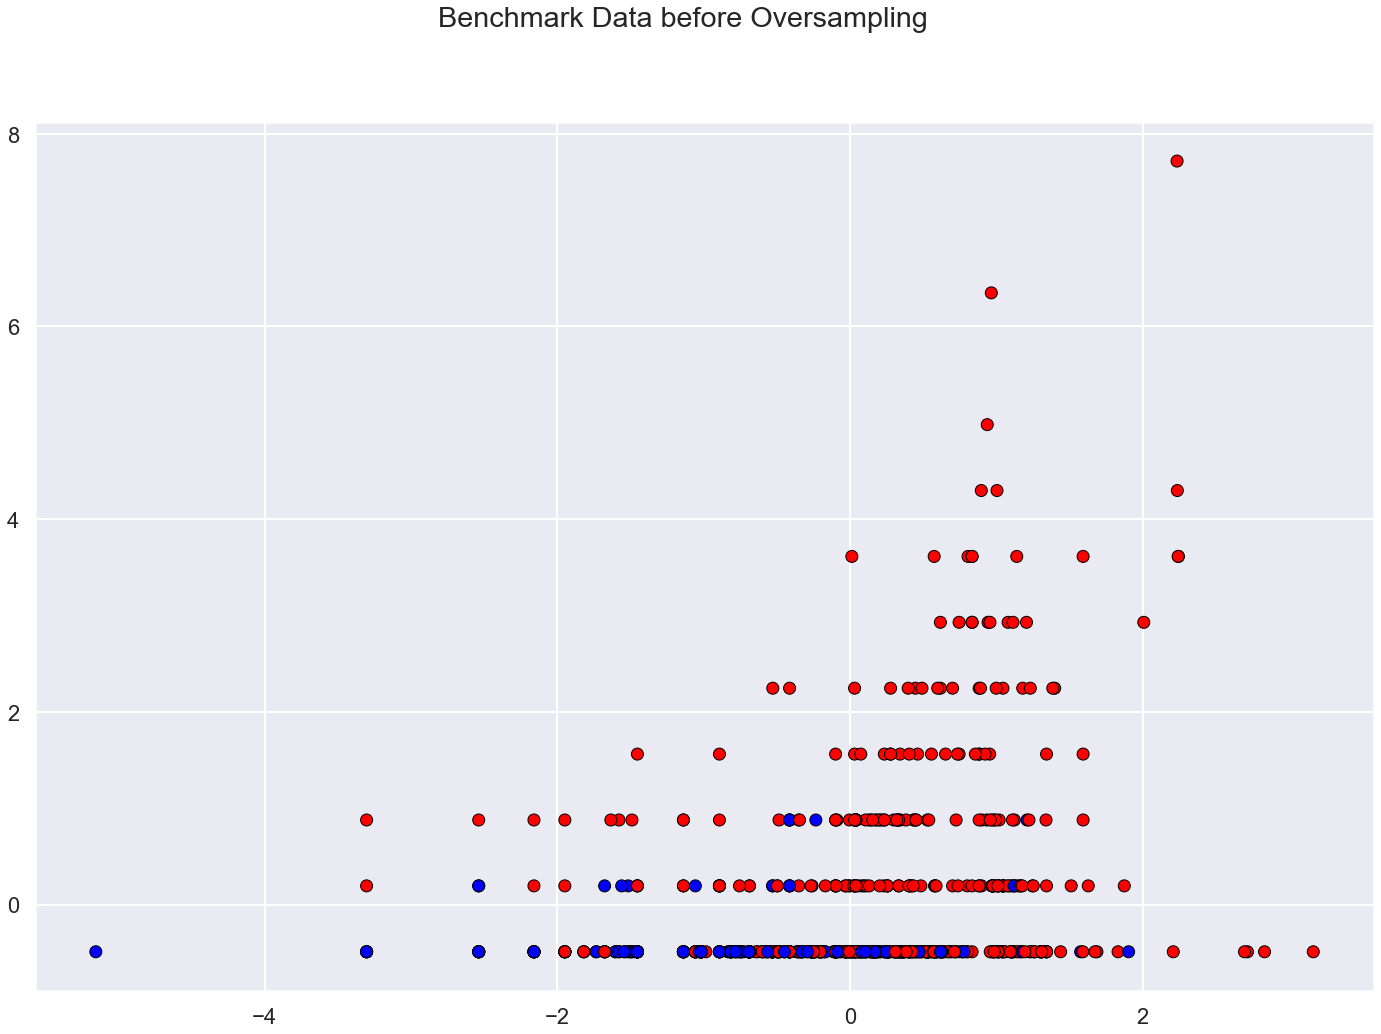

In [46]:
colors = ['red' if v == 0 else 'blue' for v in y_train]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
fig, av = plt.subplots(figsize=(24,16))
av.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=colors, **kwarg_params)
plt.suptitle("Benchmark Data before Oversampling")
plt.show()

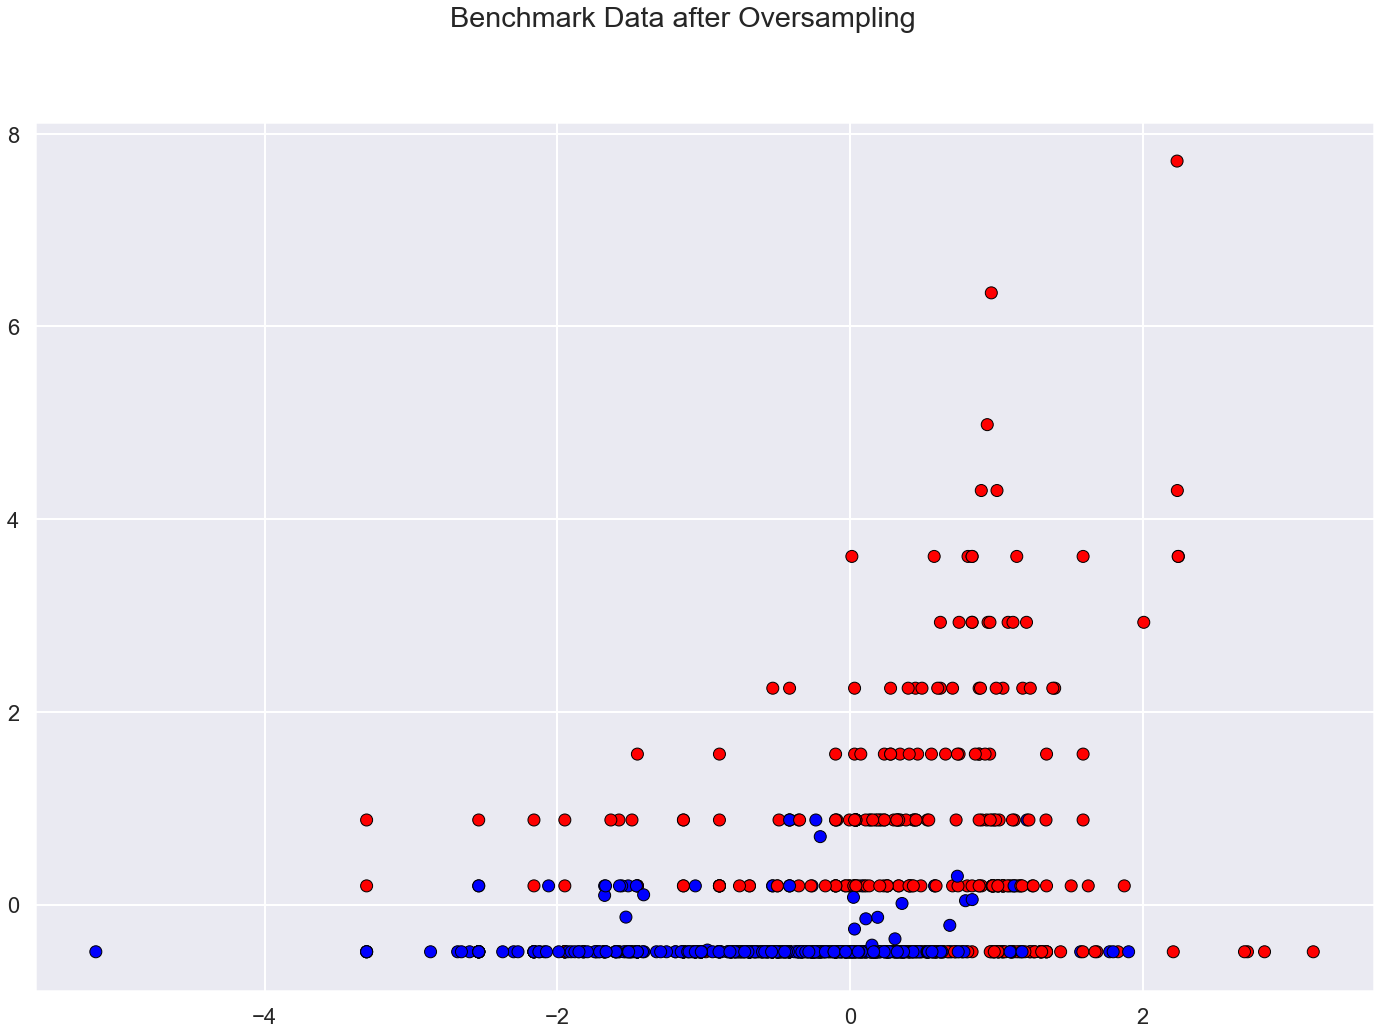

In [47]:
colors = ['red' if v == 0 else 'blue' for v in y_train_res]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
fig, av = plt.subplots(figsize=(24,16))
av.scatter(X_train_res.iloc[:, 0], X_train_res.iloc[:, 1], c=colors, **kwarg_params)
plt.suptitle("Benchmark Data after Oversampling")
plt.show()

In [48]:
lr1 = LogisticRegression(random_state = 30)
clf_smote = lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86       211
           1       0.69      0.88      0.77       105

    accuracy                           0.83       316
   macro avg       0.81      0.84      0.82       316
weighted avg       0.85      0.83      0.83       316



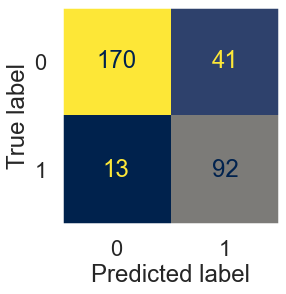

In [49]:
sns.set_context("poster")
disp = plot_confusion_matrix(clf_smote, X_test, y_test, cmap = 'cividis', colorbar=False)
plt.grid(False)

With oversampling its **recall** has increased on the minority of class to 88 %

## 7.3 NearMiss Algorithm – Undersampling

In [50]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()

X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())

print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))

print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))


Before Undersampling, counts of label '1': 251
Before Undersampling, counts of label '0': 486 

After Undersampling, the shape of train_X: (502, 30)
After Undersampling, the shape of train_y: (502,) 

After Undersampling, counts of label '1': 251
After Undersampling, counts of label '0': 251


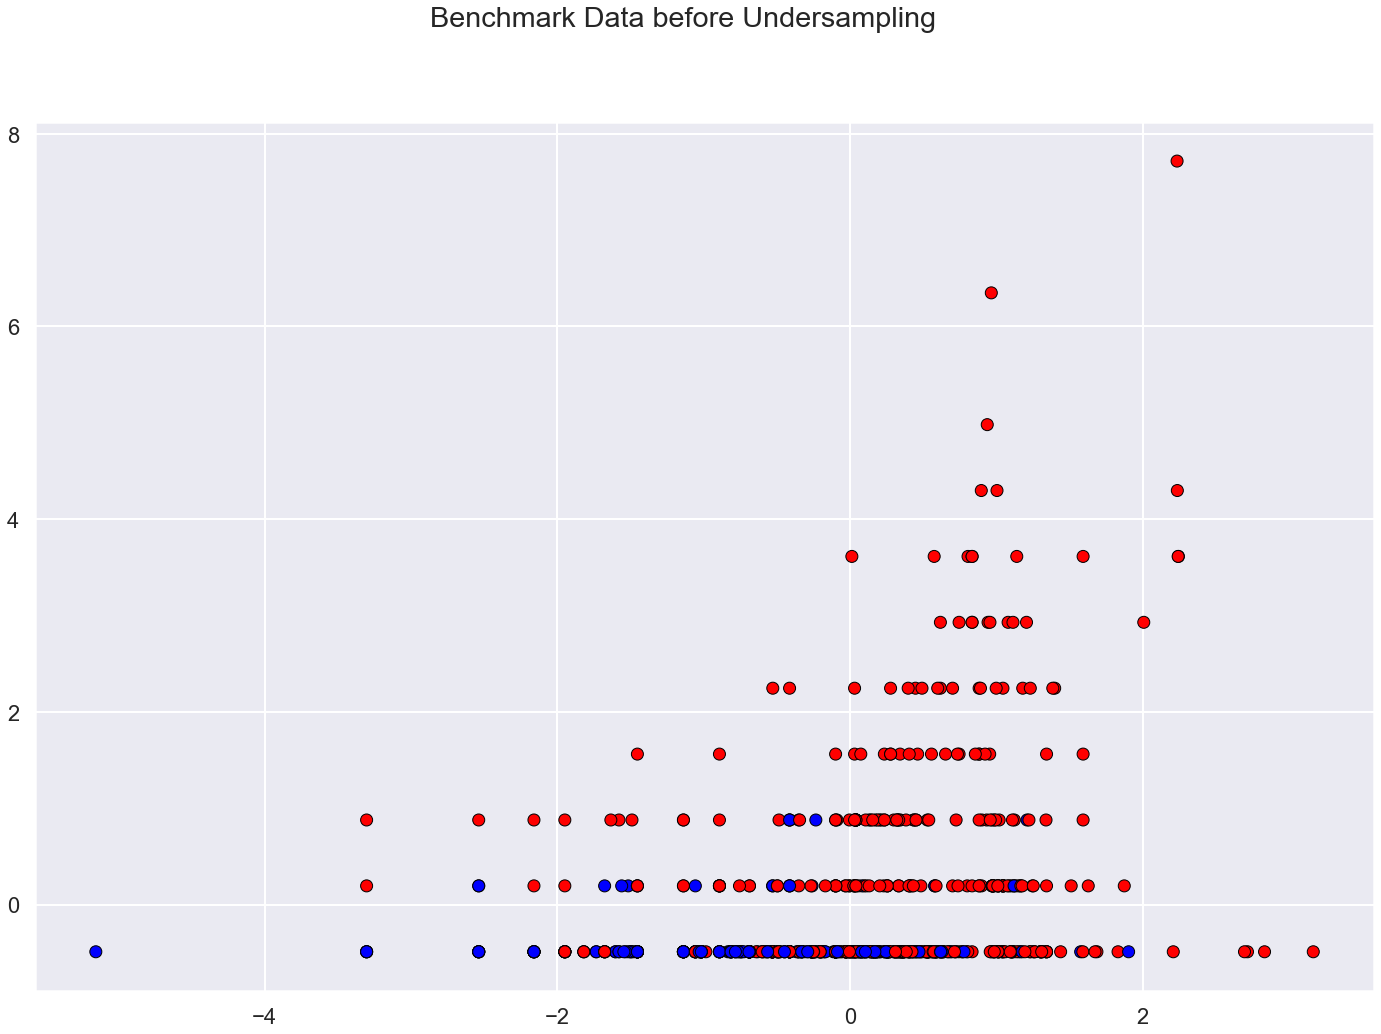

In [51]:
colors = ['red' if v == 0 else 'blue' for v in y_train]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
fig, av = plt.subplots(figsize=(24,16))
av.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=colors, **kwarg_params)
plt.suptitle("Benchmark Data before Undersampling")
plt.show()

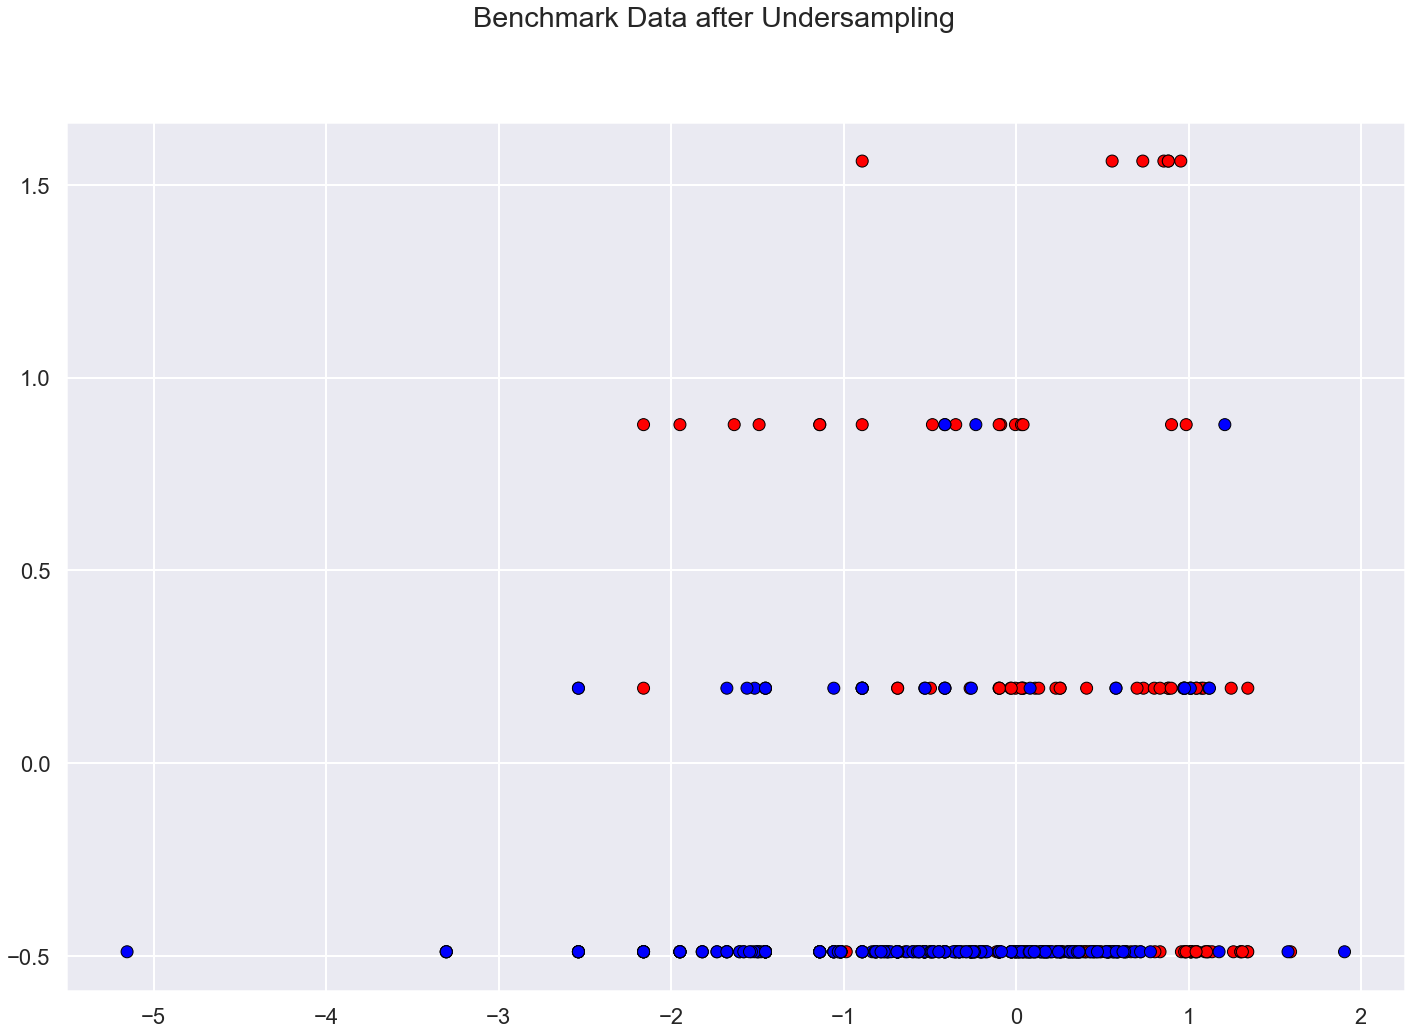

In [52]:
colors = ['red' if v == 0 else 'blue' for v in y_train_miss]
kwarg_params = {'linewidth': 1, 'edgecolor': 'black'}
fig, av = plt.subplots(figsize=(24,16))
av.scatter(X_train_miss.iloc[:, 0], X_train_miss.iloc[:, 1], c=colors, **kwarg_params)
plt.suptitle("Benchmark Data after Undersampling")
plt.show()

In [53]:
# train the model on train set
lr2 = LogisticRegression(random_state = 30)
clf_miss = lr2.fit(X_train_miss, y_train_miss.ravel())
predictions = lr2.predict(X_test)

# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       211
           1       0.70      0.85      0.76       105

    accuracy                           0.83       316
   macro avg       0.81      0.83      0.81       316
weighted avg       0.84      0.83      0.83       316



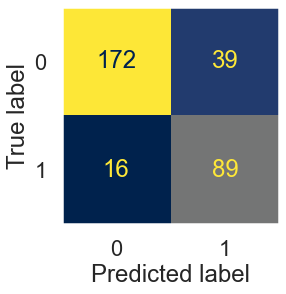

In [54]:
sns.set_context("poster")
disp = plot_confusion_matrix(clf_miss, X_test, y_test, cmap = 'cividis', colorbar=False)
plt.grid(False)

## 7.4 Chosing the Oversampling method (SMOTE)

In [55]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, counts of label '1': 486
After OverSampling, counts of label '0': 486


Since undersampling may discard the useful information which could be important for building good classifiers. I went with the Oversampling method with SMOTE.
Undersampling gets you less data, and most classifiers' performance suffers with less data.

### Why are we doing this ?
With a greater imbalanced ratio, the decision function favor the class with the larger number of samples, usually referred as the majority class. Roughly speaking, weight of class begins depending on count samples. Also, we can't use some metrics, like **accuracy**, if we have disproportion of samples. **The objective here is to try to get the best accuracy on a reliable model.**


### Important note :
I first used SMOTE and then split the data into train test split. The results were really good, the confusion matrix and classification report were really good. As I understood the problem with this approach is that the new synthetically created observations from the minority class in the training dataset might end up in the testing dataset. This in a way allows the algorithm to "cheat" since it learned from something similar and now is testing on almost very similar data points.

Which is understandable because if I first used SMOTE and then split the data into train test split is that the original sample in training (testing) and the synthetic sample (that was created based on this original sample) in the test (training) set.

When the model is in production, it’s predicting on unseen data. The main point of model validation is to estimate how the model will generalize to new data. If the decision to put a model into production is based on how it performs on a validation set, it’s critical that oversampling is done correctly.

***To summarize:*** When you use any sampling technique you divide your data first and then apply synthetic sampling on the training data only. After you do the training, you use the test set which contains only original samples to evaluate.


<a name="Modeling">

# 8) Modeling
---

## 8.1 Model Selection - Comparison
Model selection is the process of selecting one final machine learning model from among a collection of candidate machine learning models for a training dataset.
Here we will be using, Cross-validation for evaluating estimator performance. We will also be using the metric **AUC_ROC**, it is one of the most important evaluation metrics for checking any classification model’s performance.

In [56]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import cross_validate

In [57]:
LR = LogisticRegression(random_state=30)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train_res, y_train_res, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [58]:
decision_tree = DecisionTreeClassifier(random_state=30)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train_res, y_train_res, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [59]:
SVM = SVC(probability = True, random_state=30)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train_res, y_train_res, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [60]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

scores = cross_validate(LDA, X_train_res, y_train_res, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [61]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train_res, y_train_res, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

In [62]:
random_forest = RandomForestClassifier(random_state=30)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train_res, y_train_res, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [63]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train_res, y_train_res, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [64]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train_res, y_train_res, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [65]:
models_initial = pd.DataFrame({
    'Models'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Models', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

In [66]:
models_initial.sort_values(by='Accuracy', ascending=False, ignore_index=True)

Models  Fitting time  Scoring time  Accuracy  \
0                    Random Forest      0.140822      0.012212  0.907589   
1           Support Vector Machine      0.141627      0.006836  0.891093   
2              K-Nearest Neighbors      0.000901      0.005736  0.860183   
3     Linear Discriminant Analysis      0.004019      0.002960  0.858036   
4              Logistic Regression      0.015340      0.003417  0.853997   
5                    Decision Tree      0.009289      0.003074  0.846896   
6  Quadratic Discriminant Analysis      0.002166      0.003636  0.845833   
7                            Bayes      0.001183      0.003048  0.809651   

   Precision    Recall  F1_score   AUC_ROC  
0   0.911531  0.907375  0.907284  0.967314  
1   0.894212  0.890875  0.890860  0.953806  
2   0.870361  0.860208  0.858984  0.937061  
3   0.864069  0.857792  0.857334  0.922316  
4   0.858205  0.853667  0.853512  0.931299  
5   0.853829  0.846750  0.845566  0.846750  
6   0.853976  0.845708  0.844902  0.934191  
7   0.826748  0.809542  0.806664  0.909865

In [67]:
models_initial.sort_values(by='F1_score', ascending=False, ignore_index=True)

Models  Fitting time  Scoring time  Accuracy  \
0                    Random Forest      0.140822      0.012212  0.907589   
1           Support Vector Machine      0.141627      0.006836  0.891093   
2              K-Nearest Neighbors      0.000901      0.005736  0.860183   
3     Linear Discriminant Analysis      0.004019      0.002960  0.858036   
4              Logistic Regression      0.015340      0.003417  0.853997   
5                    Decision Tree      0.009289      0.003074  0.846896   
6  Quadratic Discriminant Analysis      0.002166      0.003636  0.845833   
7                            Bayes      0.001183      0.003048  0.809651   

   Precision    Recall  F1_score   AUC_ROC  
0   0.911531  0.907375  0.907284  0.967314  
1   0.894212  0.890875  0.890860  0.953806  
2   0.870361  0.860208  0.858984  0.937061  
3   0.864069  0.857792  0.857334  0.922316  
4   0.858205  0.853667  0.853512  0.931299  
5   0.853829  0.846750  0.845566  0.846750  
6   0.853976  0.845708  0.844902  0.934191  
7   0.826748  0.809542  0.806664  0.909865

In [68]:
models_initial.sort_values(by='Precision', ascending=False, ignore_index=True)

Models  Fitting time  Scoring time  Accuracy  \
0                    Random Forest      0.140822      0.012212  0.907589   
1           Support Vector Machine      0.141627      0.006836  0.891093   
2              K-Nearest Neighbors      0.000901      0.005736  0.860183   
3     Linear Discriminant Analysis      0.004019      0.002960  0.858036   
4              Logistic Regression      0.015340      0.003417  0.853997   
5  Quadratic Discriminant Analysis      0.002166      0.003636  0.845833   
6                    Decision Tree      0.009289      0.003074  0.846896   
7                            Bayes      0.001183      0.003048  0.809651   

   Precision    Recall  F1_score   AUC_ROC  
0   0.911531  0.907375  0.907284  0.967314  
1   0.894212  0.890875  0.890860  0.953806  
2   0.870361  0.860208  0.858984  0.937061  
3   0.864069  0.857792  0.857334  0.922316  
4   0.858205  0.853667  0.853512  0.931299  
5   0.853976  0.845708  0.844902  0.934191  
6   0.853829  0.846750  0.845566  0.846750  
7   0.826748  0.809542  0.806664  0.909865

In [69]:
models_initial.sort_values(by='Recall', ascending=False, ignore_index=True)

Models  Fitting time  Scoring time  Accuracy  \
0                    Random Forest      0.140822      0.012212  0.907589   
1           Support Vector Machine      0.141627      0.006836  0.891093   
2              K-Nearest Neighbors      0.000901      0.005736  0.860183   
3     Linear Discriminant Analysis      0.004019      0.002960  0.858036   
4              Logistic Regression      0.015340      0.003417  0.853997   
5                    Decision Tree      0.009289      0.003074  0.846896   
6  Quadratic Discriminant Analysis      0.002166      0.003636  0.845833   
7                            Bayes      0.001183      0.003048  0.809651   

   Precision    Recall  F1_score   AUC_ROC  
0   0.911531  0.907375  0.907284  0.967314  
1   0.894212  0.890875  0.890860  0.953806  
2   0.870361  0.860208  0.858984  0.937061  
3   0.864069  0.857792  0.857334  0.922316  
4   0.858205  0.853667  0.853512  0.931299  
5   0.853829  0.846750  0.845566  0.846750  
6   0.853976  0.845708  0.844902  0.934191  
7   0.826748  0.809542  0.806664  0.909865

In [70]:
models_initial.sort_values(by='AUC_ROC', ascending=False, ignore_index=True)

Models  Fitting time  Scoring time  Accuracy  \
0                    Random Forest      0.140822      0.012212  0.907589   
1           Support Vector Machine      0.141627      0.006836  0.891093   
2              K-Nearest Neighbors      0.000901      0.005736  0.860183   
3  Quadratic Discriminant Analysis      0.002166      0.003636  0.845833   
4              Logistic Regression      0.015340      0.003417  0.853997   
5     Linear Discriminant Analysis      0.004019      0.002960  0.858036   
6                            Bayes      0.001183      0.003048  0.809651   
7                    Decision Tree      0.009289      0.003074  0.846896   

   Precision    Recall  F1_score   AUC_ROC  
0   0.911531  0.907375  0.907284  0.967314  
1   0.894212  0.890875  0.890860  0.953806  
2   0.870361  0.860208  0.858984  0.937061  
3   0.853976  0.845708  0.844902  0.934191  
4   0.858205  0.853667  0.853512  0.931299  
5   0.864069  0.857792  0.857334  0.922316  
6   0.826748  0.809542  0.806664  0.909865  
7   0.853829  0.846750  0.845566  0.846750

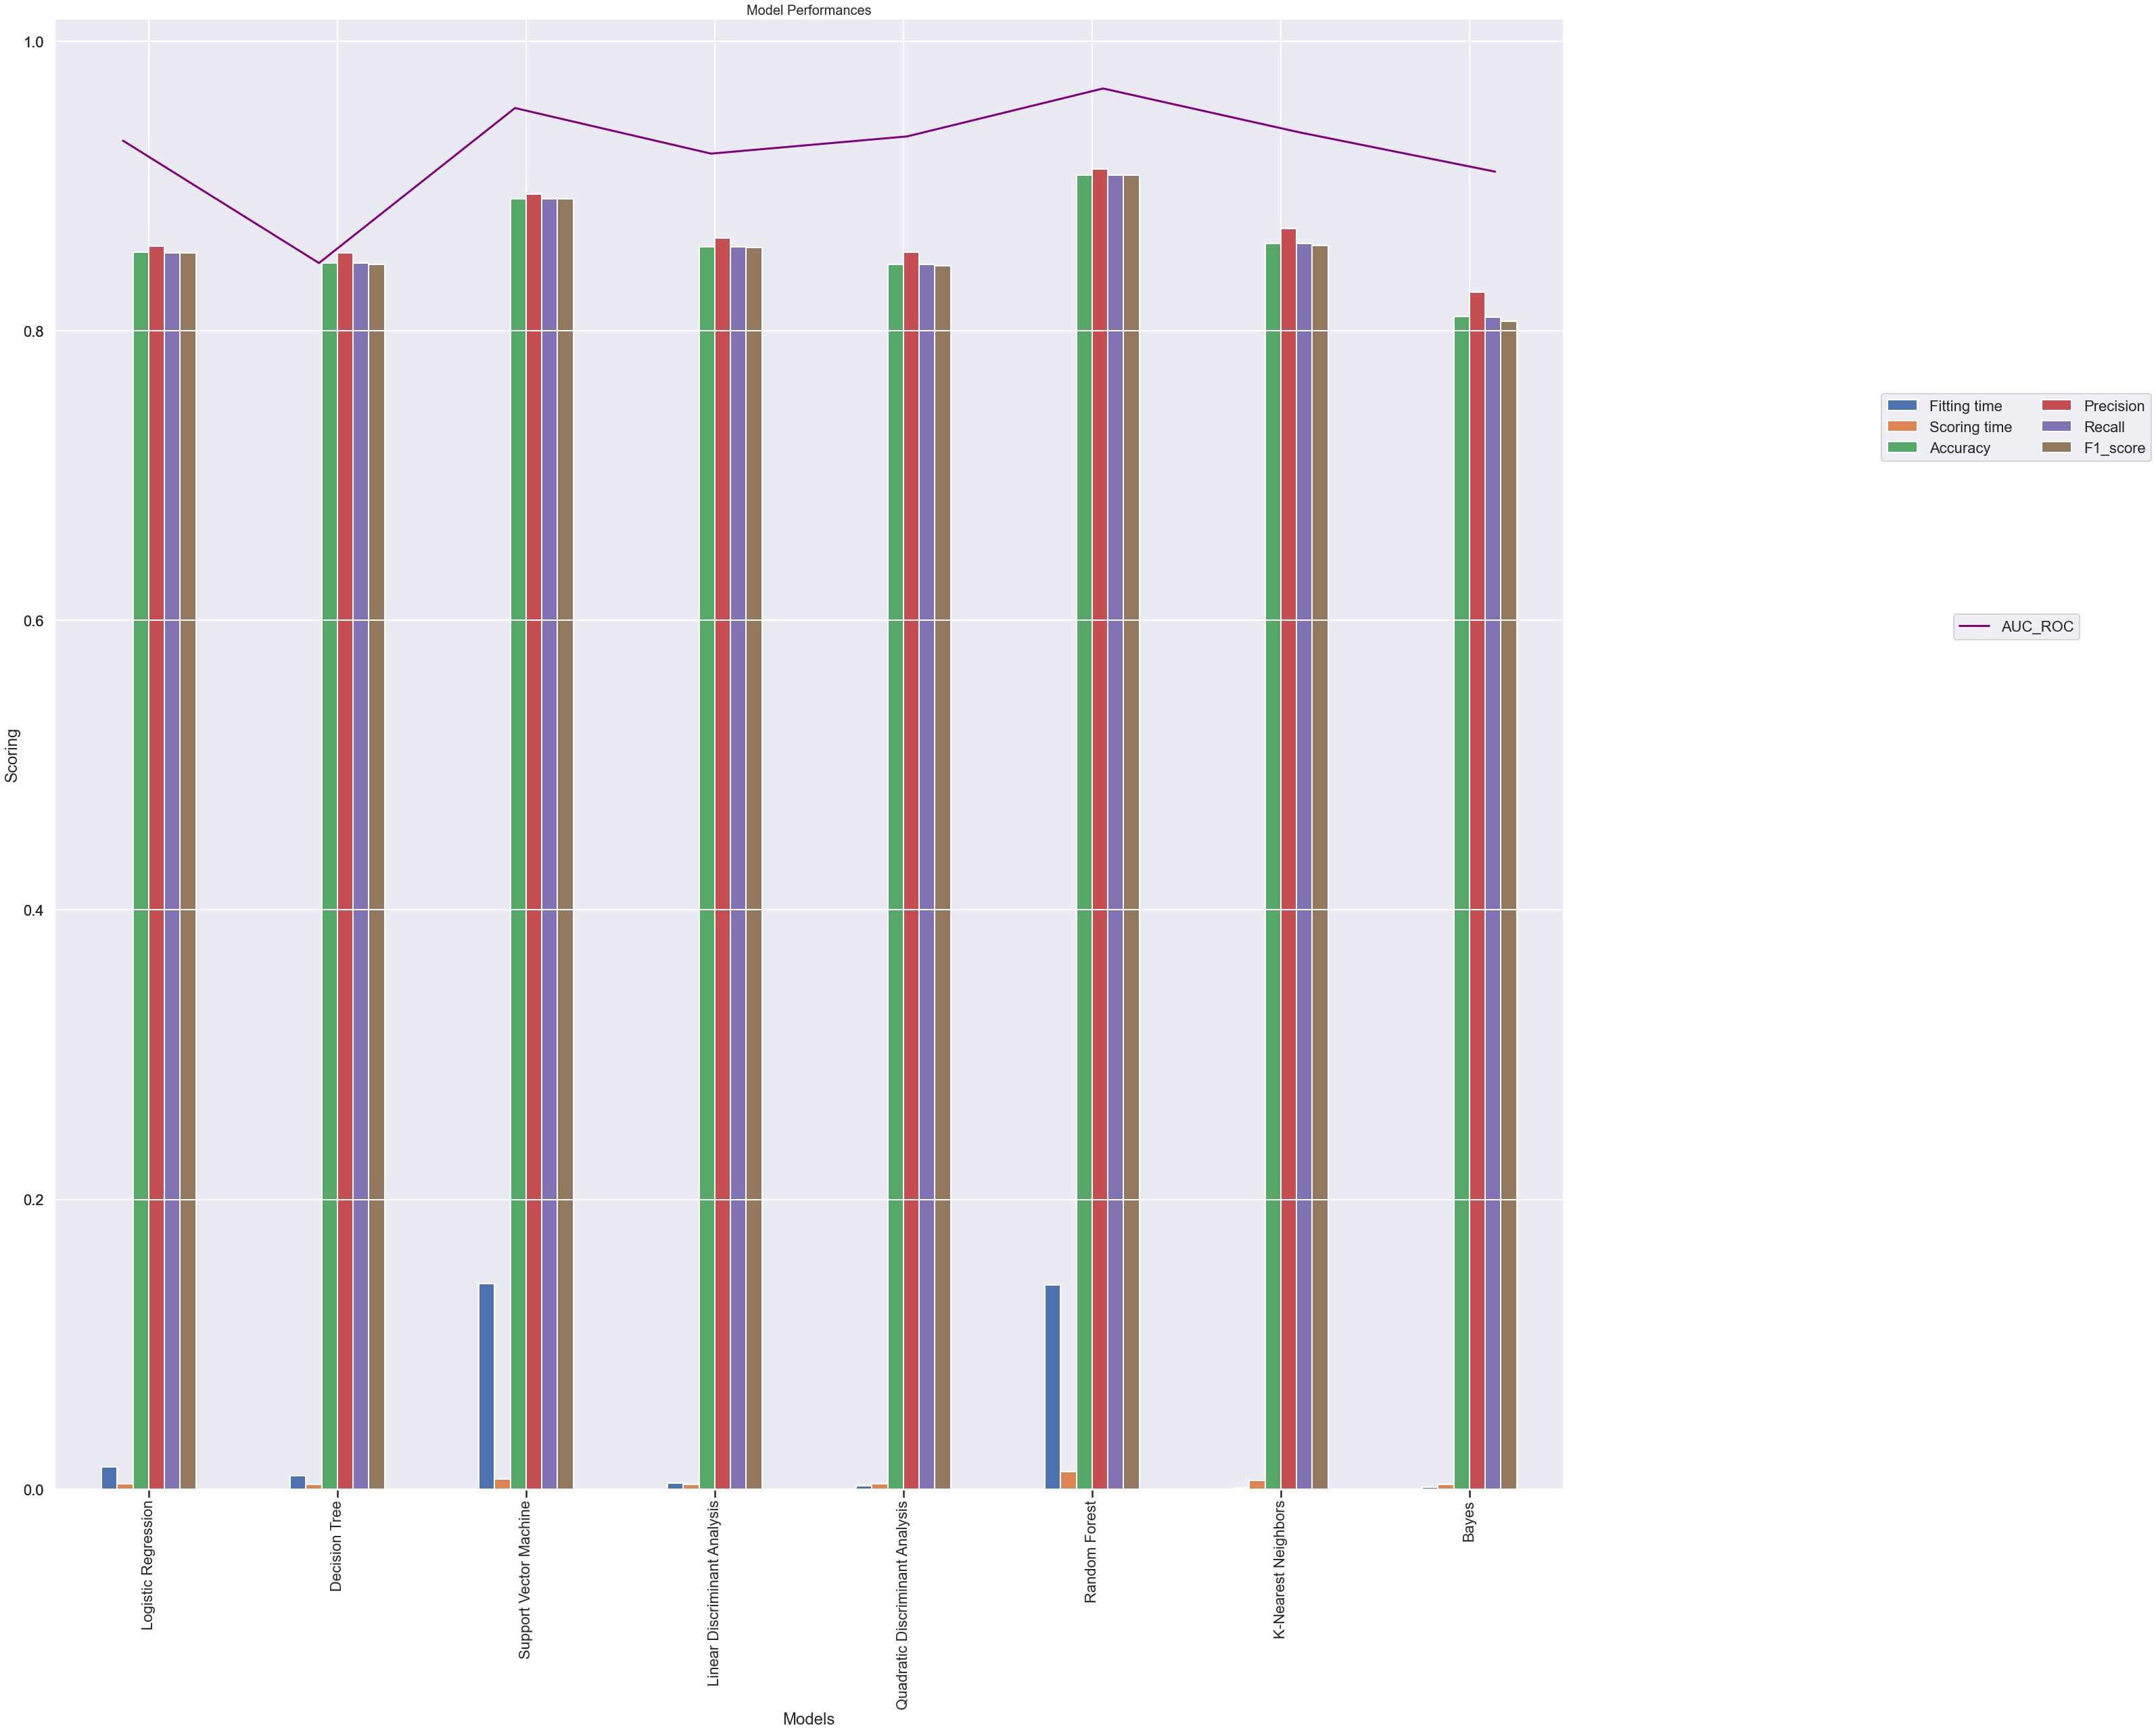

In [71]:
# Seperate into two data frame (performance_metric and AUC_ROC_performance) 
models_initial.index = models_initial['Models']
performance_metric = models_initial
AUC_ROC_performance = models_initial['AUC_ROC']
performance_metric = performance_metric.drop(columns = 'AUC_ROC')

# Bar plot the performance_metric
ax1 = performance_metric.plot.bar()
plt.legend(loc="upper center", bbox_to_anchor=(1.3, 0.75), ncol=2)

# Line plot the AUC_ROC_performance in the same figure
ax2 = ax1.twiny()
ax2 = AUC_ROC_performance.plot.line(figsize=(40,40),color='purple')
plt.xticks([])
plt.xlabel('')

# Adjustment of the plotting
plt.xticks(rotation=90)
plt.legend(loc="upper center", bbox_to_anchor=(1.3, 0.60), ncol=2)
plt.ylabel("Scoring")
plt.title("Model Performances", fontdict = {"fontsize": 20} )
plt.show()

As we can see in overall performance, the **Random Forest** and **Support Vector Machine** models are the best ones in this selection process, in the next step we will be using them for testing.

### Note :
We are not necessarly looking for the best fit time but we see that the 2 best models in terms of performance are the ones with a bigger fit time.

<a name="Testing_Models">

# 9) Testing Models
---

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train_res, y_train_res, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train_res)
        clf_report = pd.DataFrame(classification_report(y_train_res, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train_res, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train_res, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## 9.1 Support Vector Machine

In [74]:
%%time

svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0, random_state=30)

params = {"C":(0.1, 0.5, 1, 2, 3, 5, 10, 20), 
          "gamma":(0.001, 0.02, 0.01, 0.1, 0.2, 0.25, 0.5, 0.75, 1), 
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=4, verbose=1, scoring="accuracy")
svm_cv.fit(X_train_res, y_train_res)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params, random_state=30)
svm_clf.fit(X_train_res, y_train_res)

print_score(svm_clf, X_train_res, y_train_res, X_test, y_test, train=True)
print_score(svm_clf, X_train_res, y_train_res, X_test, y_test, train=False)

Fitting 4 folds for each of 216 candidates, totalling 864 fits
Best params: {'C': 3, 'gamma': 0.2, 'kernel': 'rbf'}
Train Result:
Accuracy Score: 97.53%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.983264    0.967611  0.975309    0.975437      0.975437
recall       0.967078    0.983539  0.975309    0.975309      0.975309
f1-score     0.975104    0.975510  0.975309    0.975307      0.975307
support    486.000000  486.000000  0.975309  972.000000    972.000000
_______________________________________________
Confusion Matrix: 
 [[470  16]
 [  8 478]]

Test Result:
Accuracy Score: 89.24%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.927536    0.825688  0.892405    0.876612      0.893694
recall       0.909953    0.857143  0.892405    0.883548      0.892405
f1-score     0.91

## 9.2 Random Forest Classifier

In [75]:
%%time
# n_estimators = [1200, 1400, 1600, 2000]

n_estimators = [2000, 2200, 2300]
max_features = [2, 3]
max_depth = [40,50,60,70]
min_samples_split = [9, 10, 11]
min_samples_leaf = [1,2]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
              }

rf_clf = RandomForestClassifier(random_state=30)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=2, n_jobs=-1)
rf_cv.fit(X_train_res, y_train_res)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params, random_state=30)
rf_clf.fit(X_train_res, y_train_res)

print_score(rf_clf, X_train_res, y_train_res, X_test, y_test, train=True)
print_score(rf_clf, X_train_res, y_train_res, X_test, y_test, train=False)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameters: {'max_depth': 40, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 2000}
Train Result:
Accuracy Score: 97.22%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.971253    0.973196  0.972222    0.972224      0.972224
recall       0.973251    0.971193  0.972222    0.972222      0.972222
f1-score     0.972251    0.972194  0.972222    0.972222      0.972222
support    486.000000  486.000000  0.972222  972.000000    972.000000
_______________________________________________
Confusion Matrix: 
 [[473  13]
 [ 14 472]]

Test Result:
Accuracy Score: 86.08%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.915423    0.765217  0.860759    0.840320      0.865513
recall       0.87

In this process, we modified the hyperparamenter of each models to see how it performed by using GridSearchCV()

I am satisfied by the overall result of the Support Vector Machine (SVM) model with an accuracy of **89.24%**

### Note :
We need to check the accuracy difference between train and test set for each fold result. If my model gives me high training accuracy but low test accuracy my model is overfitting. On the other hand if it does not give good training accuracy, my model model is underfitting.

<a name="Final_Model_&_Conclusion">

# 10) Final Model & Conclusion
---

## 10.1 Saving final model using Joblib

In [76]:
#Saving final model : Support Vector Machine (SVM)
import joblib
filename = 'finalized_model.sav'
joblib.dump(svm_clf, filename)

['finalized_model.sav']

## 10.2 Conclusion

In this project, our objective was to make sure we have a reliable model that can be used in order to determine if a substance is biodegradable or not.

I conclude that the best type of model for this problem is a Support Vector Machine (SVM) model with an accuracy of **89.24%** 